In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from tensorflow.keras.regularizers import l2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.activations import swish  # Ensure 'swish' activation is available
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from scipy import stats
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import shap

# Display all columns
pd.set_option('display.max_columns', None)
# Display all rows (if needed)
pd.set_option('display.max_rows', None)
# Adjust the display width to automatically fit the content

shap.initjs()

c:\Users\Malte\projects\cropRecommendation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('Crop_recommendation.csv')

# Display the first 5 rows
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


    N   P   K  temperature   humidity        ph    rainfall  label_apple  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536        False   
1  85  58  41    21.770462  80.319644  7.038096  226.655537        False   
2  60  55  44    23.004459  82.320763  7.840207  263.964248        False   
3  74  35  40    26.491096  80.158363  6.980401  242.864034        False   
4  78  42  42    20.130175  81.604873  7.628473  262.717340        False   

   label_banana  label_blackgram  label_chickpea  label_coconut  label_coffee  \
0         False            False           False          False         False   
1         False            False           False          False         False   
2         False            False           False          False         False   
3         False            False           False          False         False   
4         False            False           False          False         False   

   label_cotton  label_grapes  label_jute  label_kidneyb

C:\Users\Malte\AppData\Local\Temp\ipykernel_674416\1833053127.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette='Set2')


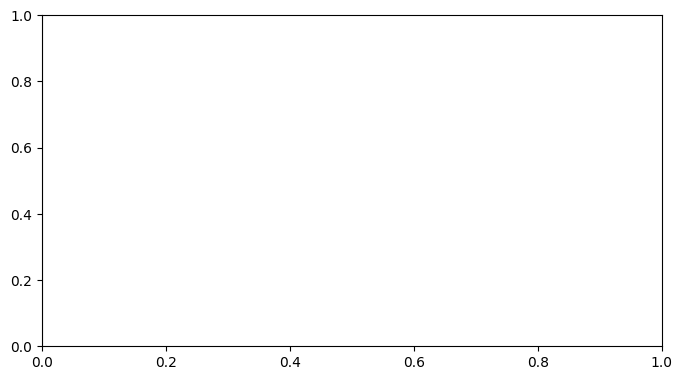

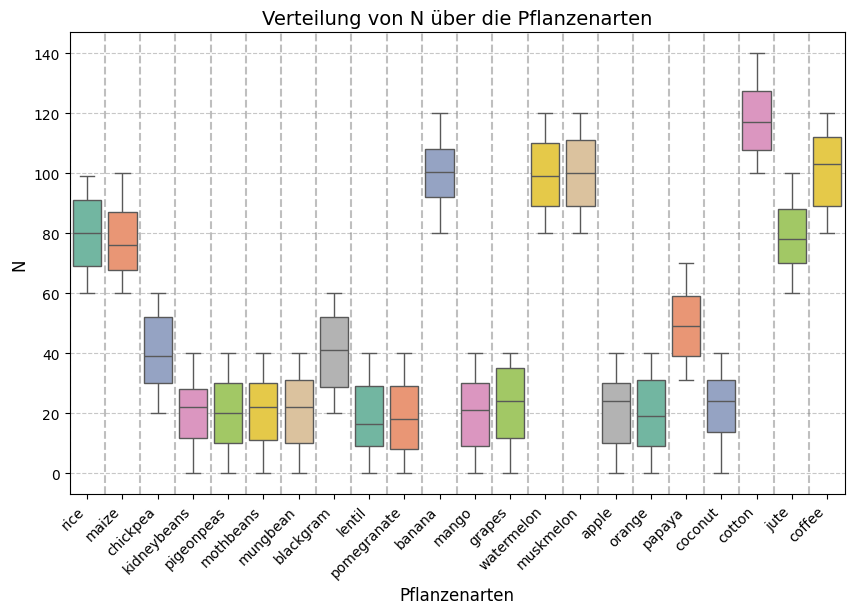

C:\Users\Malte\AppData\Local\Temp\ipykernel_674416\1833053127.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette='Set2')


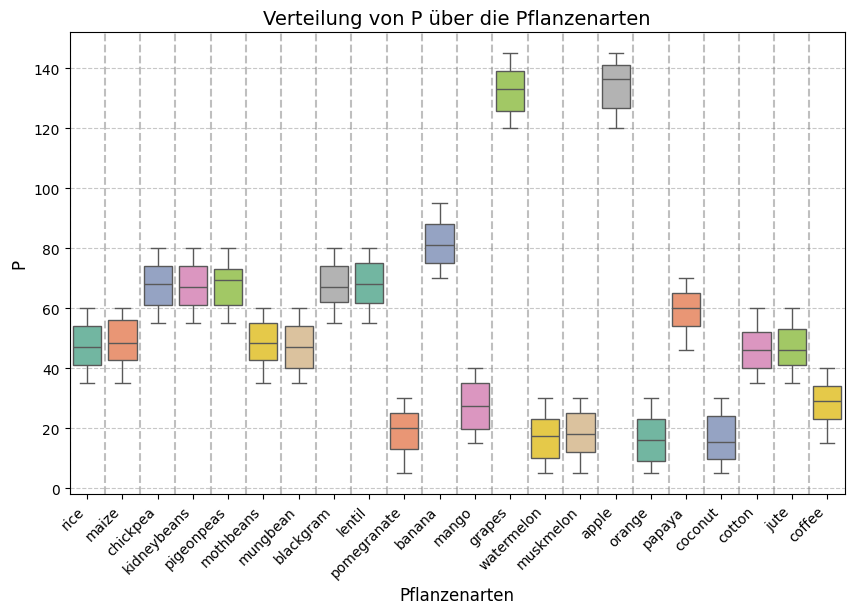

C:\Users\Malte\AppData\Local\Temp\ipykernel_674416\1833053127.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette='Set2')


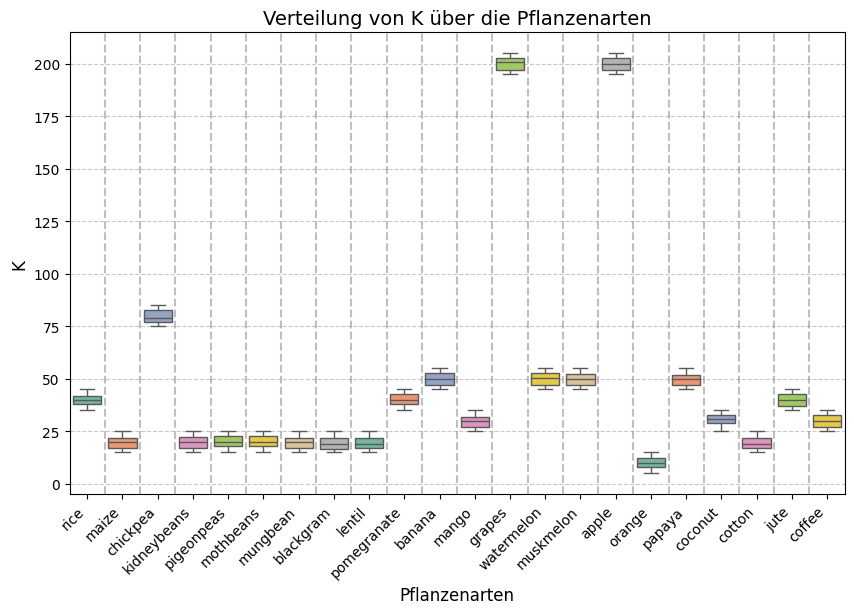

C:\Users\Malte\AppData\Local\Temp\ipykernel_674416\1833053127.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette='Set2')


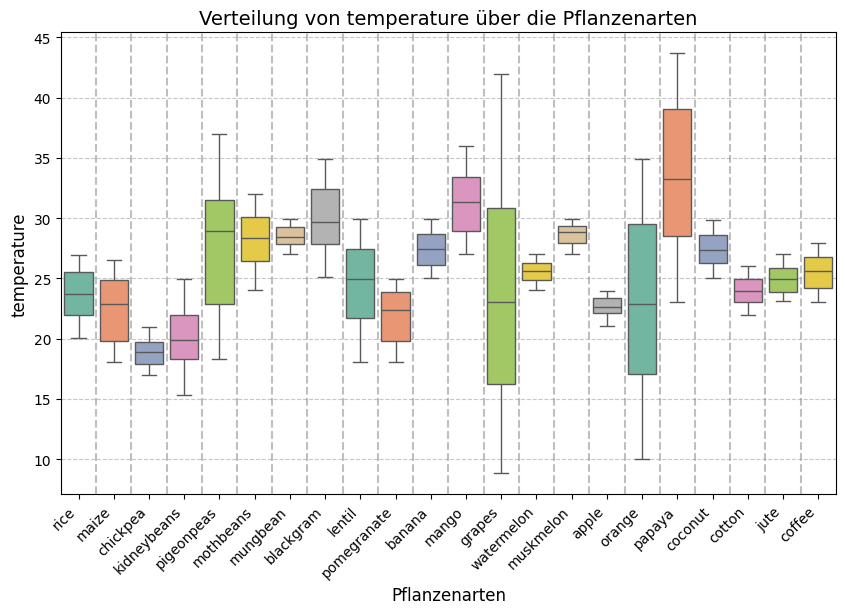

C:\Users\Malte\AppData\Local\Temp\ipykernel_674416\1833053127.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette='Set2')


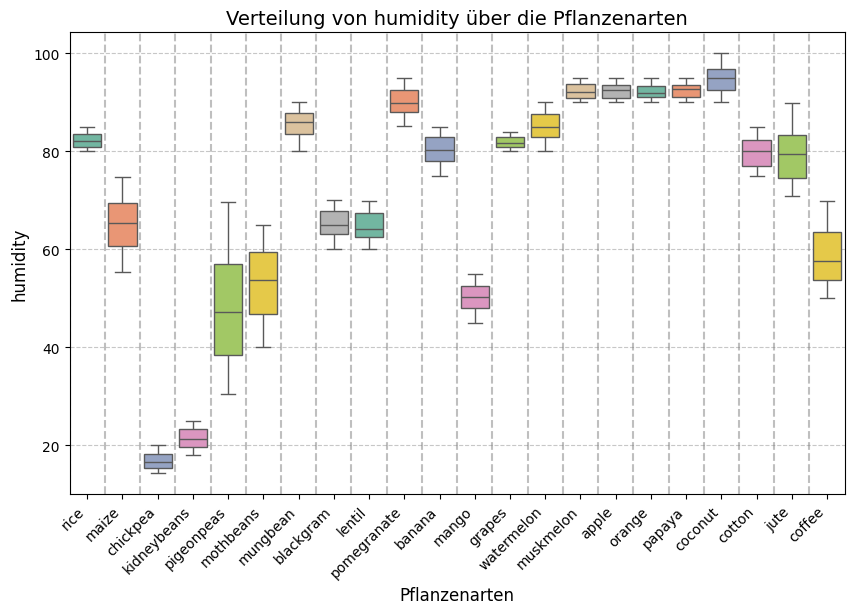

C:\Users\Malte\AppData\Local\Temp\ipykernel_674416\1833053127.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette='Set2')


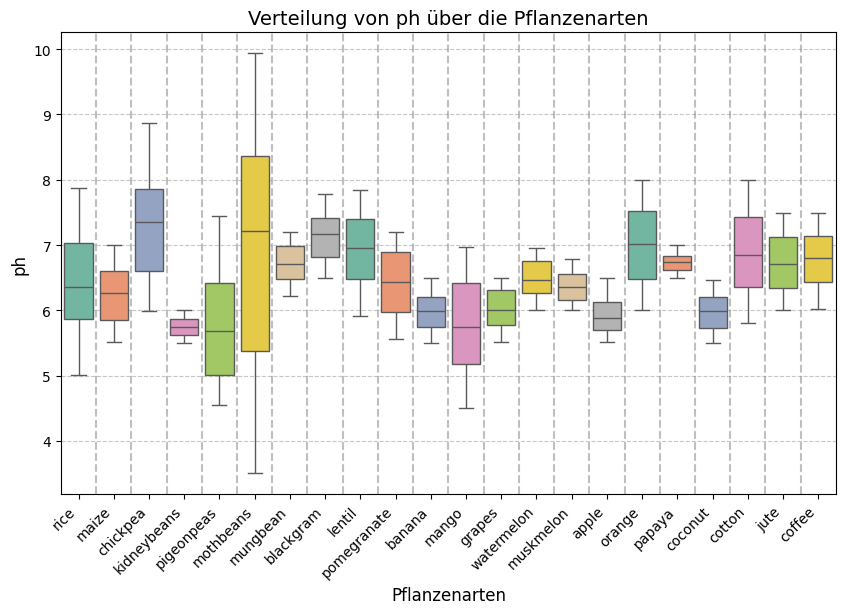

C:\Users\Malte\AppData\Local\Temp\ipykernel_674416\1833053127.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette='Set2')


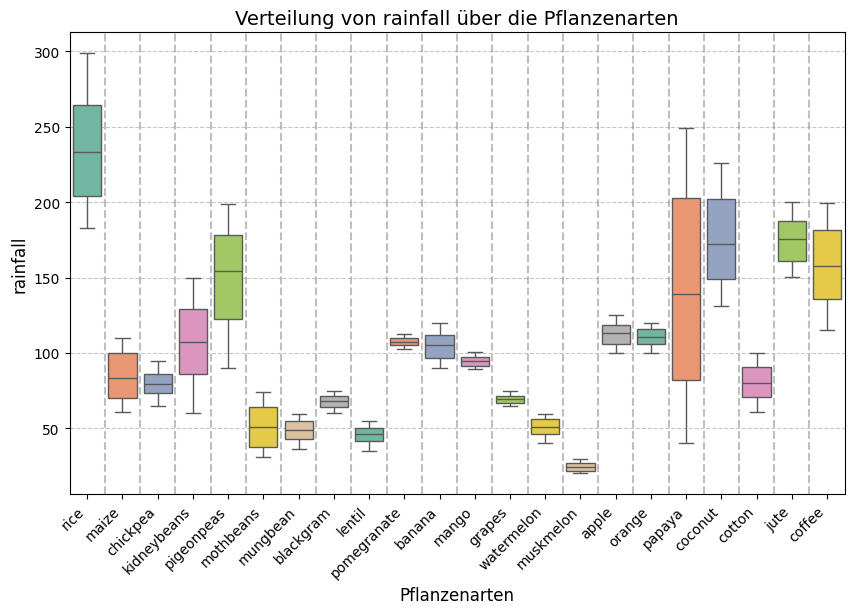

In [9]:
# One-hot encode the 'label' column
df_encoded = pd.get_dummies(df, columns=['label'])

x_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
y_columns = [col for col in df_encoded.columns if 'label' in col]

# Display the first 5 rows of the encoded dataframe
print(df_encoded.head())

print(df_encoded.describe())

# Adding vertical lines to the boxplots
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=col, data=df, palette='Set2')
    plt.title(f'Verteilung von {col} über die Pflanzenarten', fontsize=14)
    plt.xlabel('Pflanzenarten', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # Adding vertical lines at each label position
    for i in range(len(df['label'].unique())):
        plt.axvline(x=i - 0.5, color='gray', linestyle='--', alpha=0.5)
    plt.show()


Feature Descriptions:
N: Ratio of Nitrogen content in soil
P: Ratio of Phosphorous content in soil
K: Ratio of Potassium content in soil
temperature: Temperature in degree Celsius
humidity: Relative humidity in %
ph: pH value of the soil
rainfall: Rainfall in mm

Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   N                  2200 non-null   int64  
 1   P                  2200 non-null   int64  
 2   K                  2200 non-null   int64  
 3   temperature        2200 non-null   float64
 4   humidity           2200 non-null   float64
 5   ph                 2200 non-null   float64
 6   rainfall           2200 non-null   float64
 7   label_apple        2200 non-null   bool   
 8   label_banana       2200 non-null   bool   
 9   label_blackgram    2200 non-null   bool   
 10  label_chickpea     2200 non

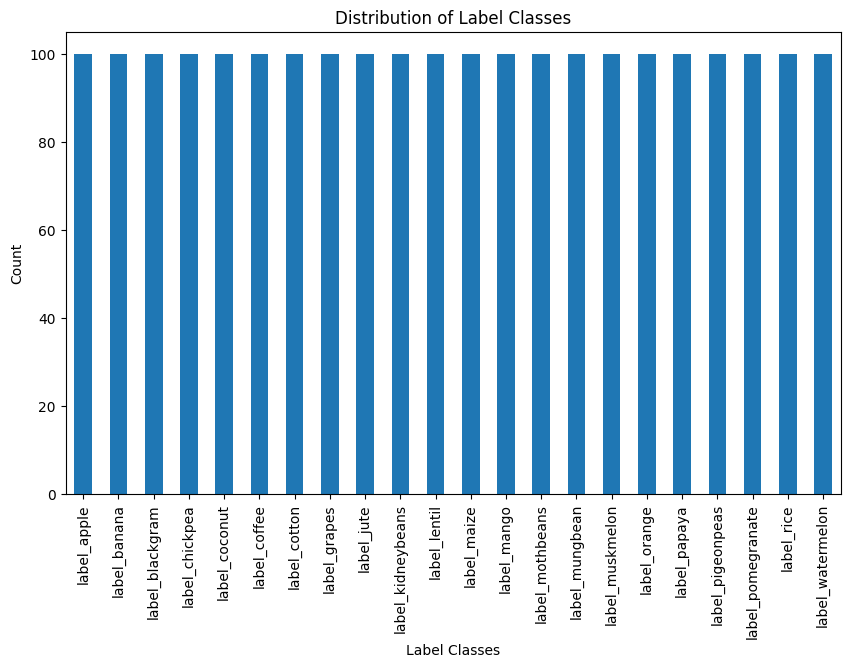


Correlation Matrix:
                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


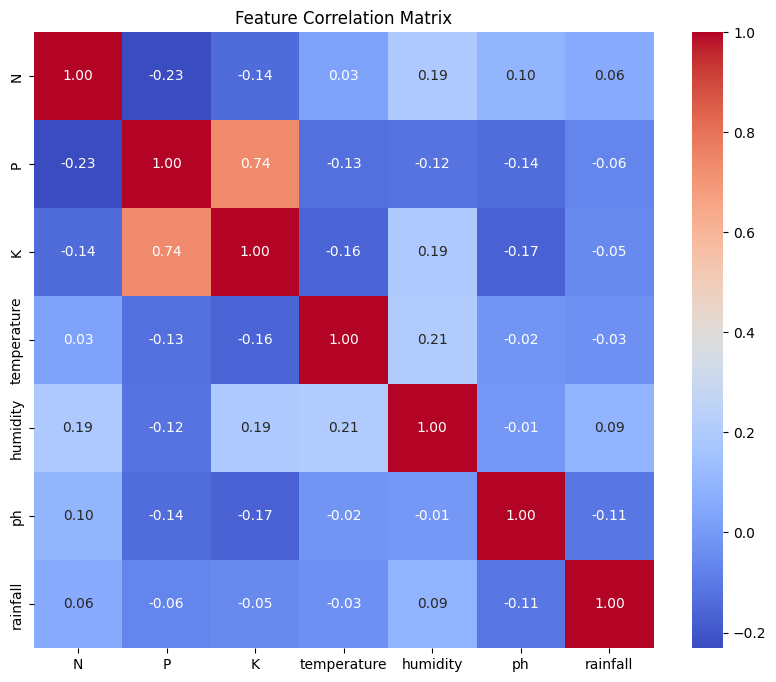

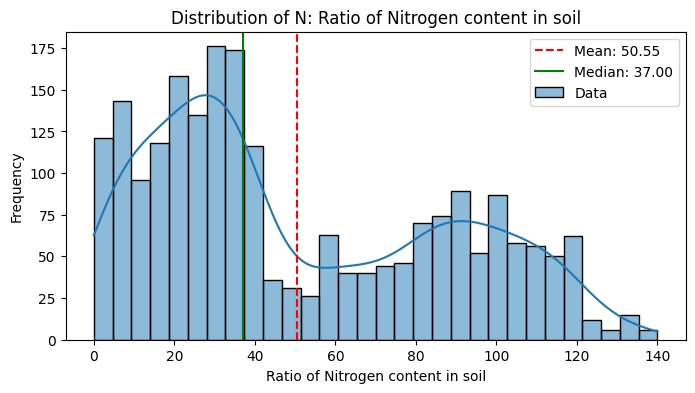

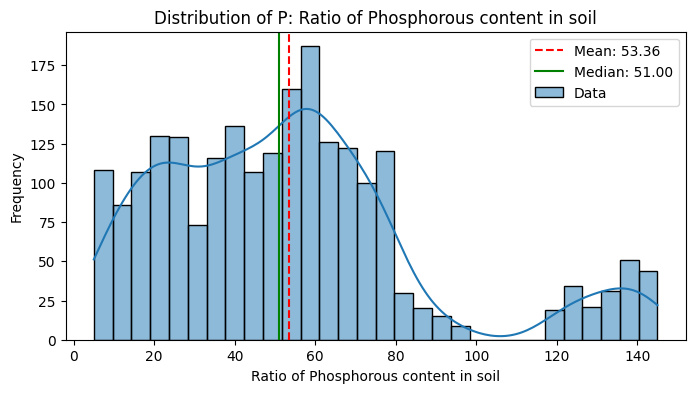

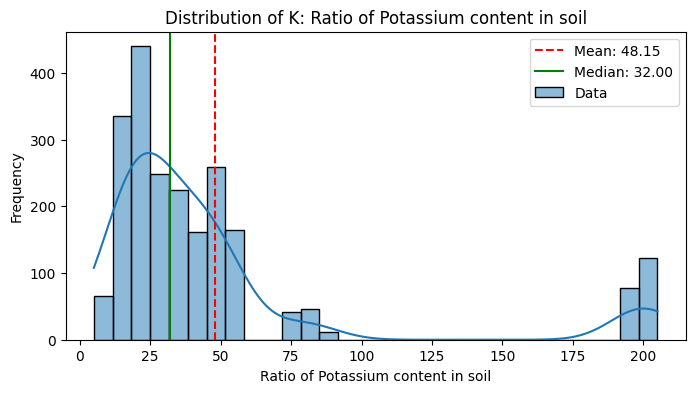

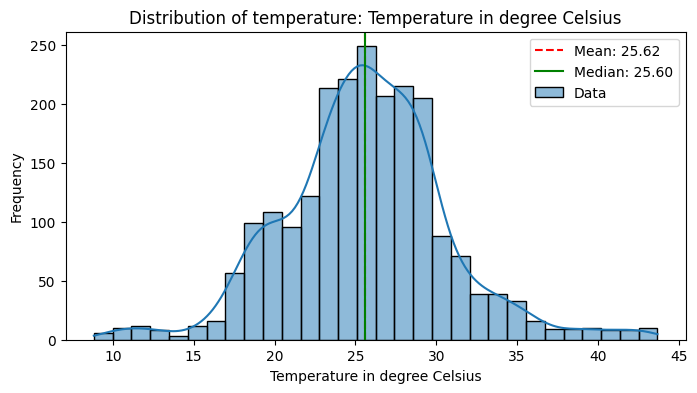

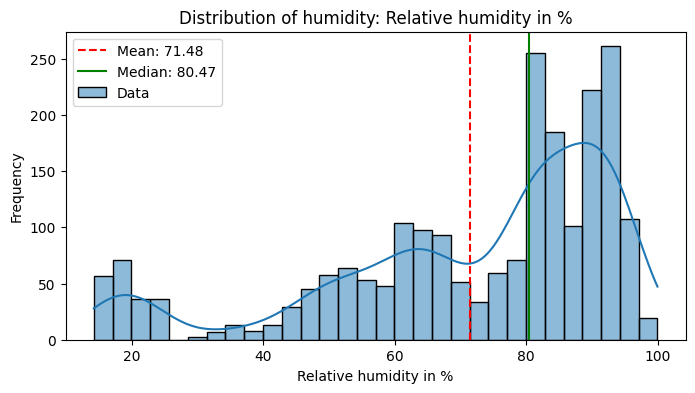

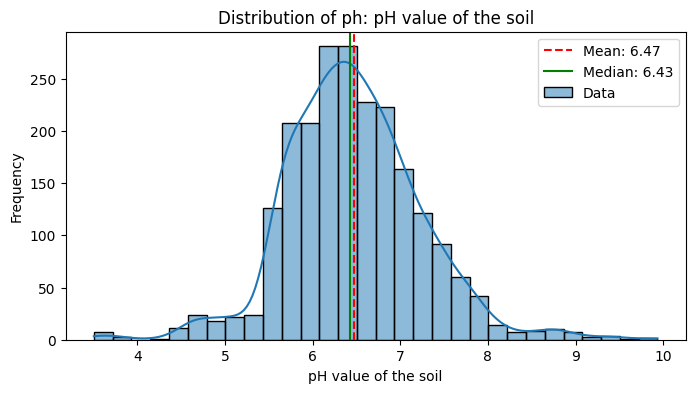

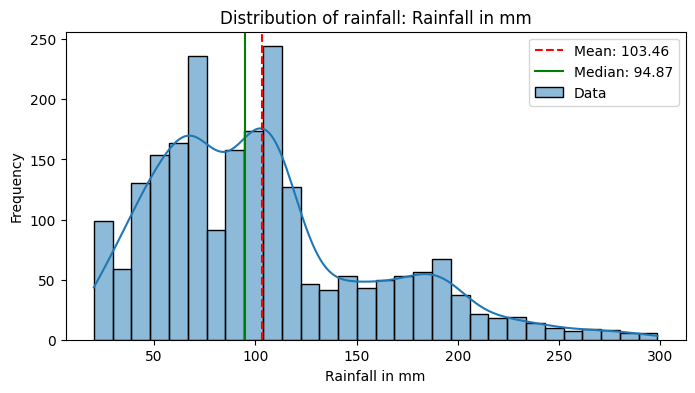

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature description dictionary
feature_info = {
    "N": "Ratio of Nitrogen content in soil",
    "P": "Ratio of Phosphorous content in soil",
    "K": "Ratio of Potassium content in soil",
    "temperature": "Temperature in degree Celsius",
    "humidity": "Relative humidity in %",
    "ph": "pH value of the soil",
    "rainfall": "Rainfall in mm",
}

# Display feature descriptions
print("\nFeature Descriptions:")
for feature, description in feature_info.items():
    print(f"{feature}: {description}")

# Basic dataset info
print("\nBasic Dataset Info:")
print(df_encoded.info())  # Check the data types and non-null counts

# Display the first few rows
print("\nFirst 5 Rows of the Dataset:")
print(df_encoded.head())

# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df_encoded.describe())

# Check for missing values
print("\nMissing Values:")
missing_values = df_encoded.isnull().sum()
print(missing_values[missing_values > 0])

# Visualize the distribution of the label classes
label_columns = [col for col in df_encoded.columns if 'label_' in col]
label_counts = df_encoded[label_columns].sum()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title("Distribution of Label Classes")
plt.xlabel("Label Classes")
plt.ylabel("Count")
plt.show()

# Correlation matrix for feature columns
feature_columns = list(feature_info.keys())
correlation_matrix = df_encoded[feature_columns].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

# Add annotations to histograms
for column in feature_columns:
    mean = df_encoded[column].mean()
    median = df_encoded[column].median()
    std_dev = df_encoded[column].std()

    plt.figure(figsize=(8, 4))
    sns.histplot(df_encoded[column], kde=True, bins=30, label="Data")
    plt.axvline(mean, color='r', linestyle='--', label=f"Mean: {mean:.2f}")
    plt.axvline(median, color='g', linestyle='-', label=f"Median: {median:.2f}")
    plt.title(f"Distribution of {column}: {feature_info[column]}")
    plt.xlabel(feature_info[column])
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(2200, 7) (2200, 1)
Epoch 1/500


c:\Users\Malte\projects\cropRecommendation\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7590 - loss: 3.6212 - val_accuracy: 0.9176 - val_loss: 0.0932
Epoch 2/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9388 - loss: 0.1022 - val_accuracy: 0.9517 - val_loss: 0.0409
Epoch 3/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9607 - loss: 0.0692 - val_accuracy: 0.9517 - val_loss: 0.0319
Epoch 4/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9639 - loss: 0.0541 - val_accuracy: 0.9517 - val_loss: 0.0325
Epoch 5/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9538 - loss: 0.0516 - val_accuracy: 0.9517 - val_loss: 0.0327
Epoch 6/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9527 - loss: 0.0446 - val_accuracy: 0.9517 - val_loss: 0.0311
Epoch 7/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9662 - loss: 0.0420 - val_accuracy: 0.9517 - val_loss: 0.0329
Epoch 8/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9606 - loss: 0.0355 - val_accuracy: 0.9517 - val_loss: 0.0

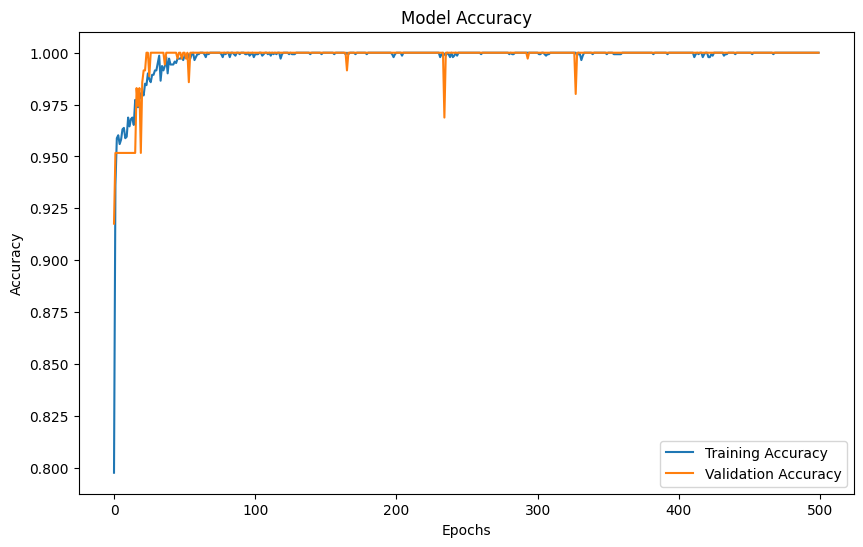

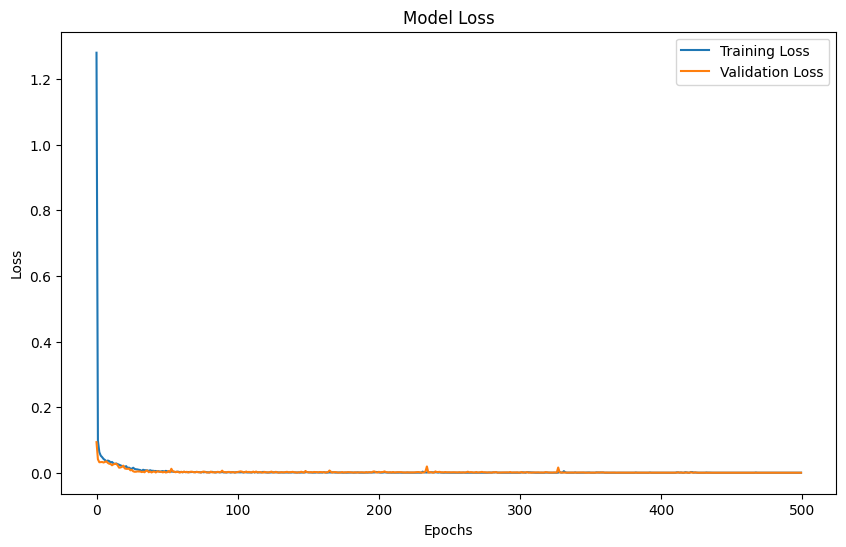

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (Y)
X = df_encoded[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].values
Y = df_encoded[[col for col in df_encoded.columns if 'label_apple' in col]].values

Y = Y.astype('float32')  # Convert the target to float32
print(Y)

# Print the shape of X and Y
print(X.shape, Y.shape)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Prevent overfitting
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(Y_train.shape[1])  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Instance 1:
Actual: [0.] | Predicted: 0.0003


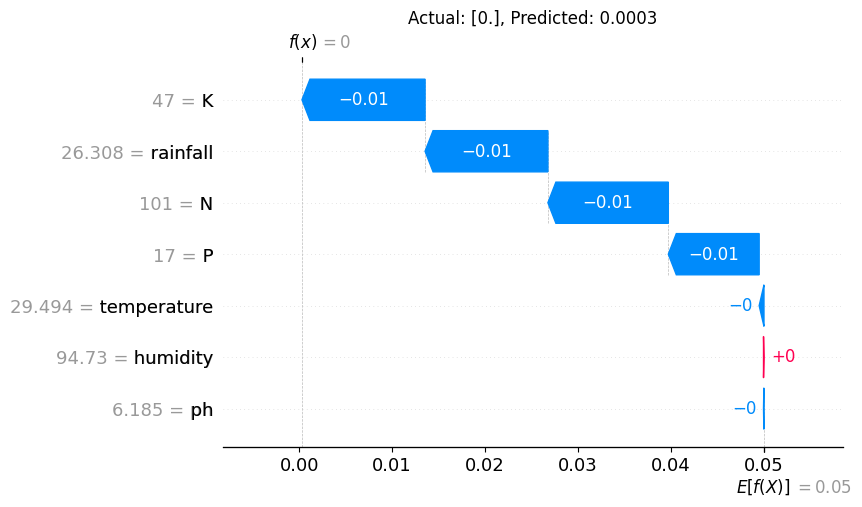

Instance 2:
Actual: [0.] | Predicted: 0.0003


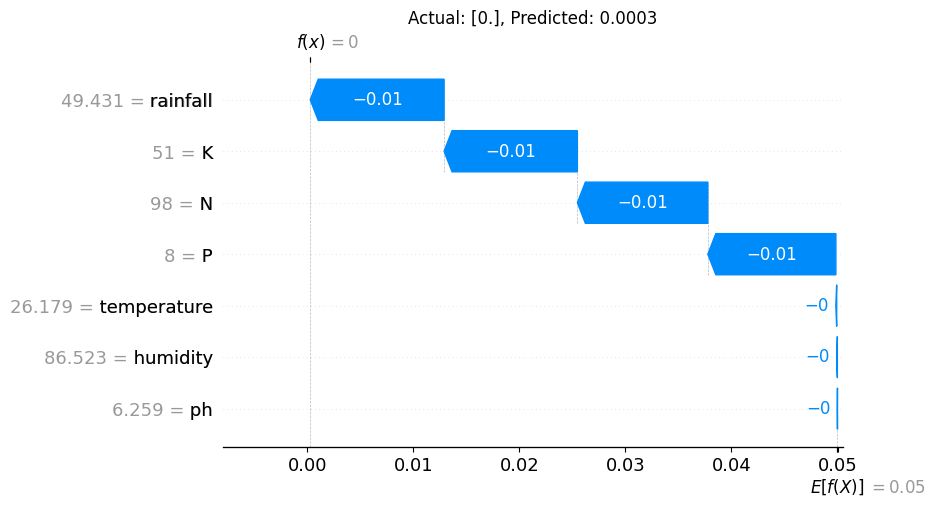

Instance 3:
Actual: [0.] | Predicted: 0.0004


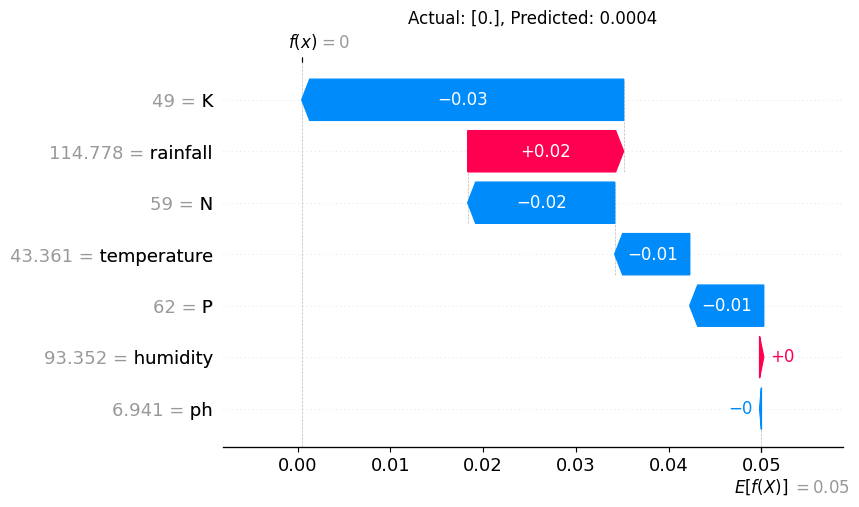

Instance 4:
Actual: [0.] | Predicted: 0.0002


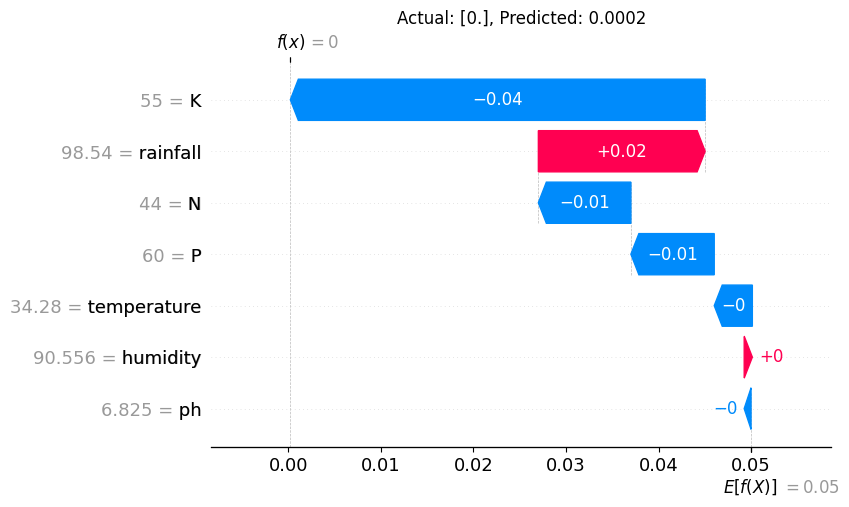

Instance 5:
Actual: [1.] | Predicted: 0.9925


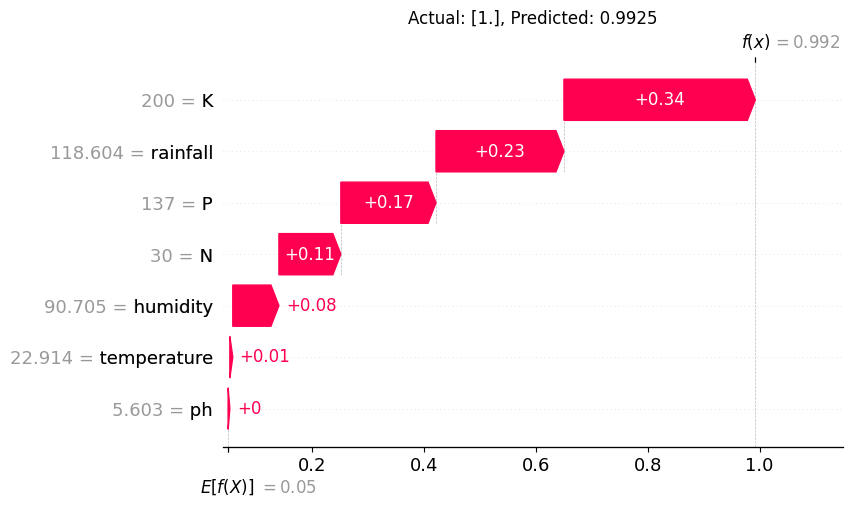

Instance 6:
Actual: [0.] | Predicted: 0.0002


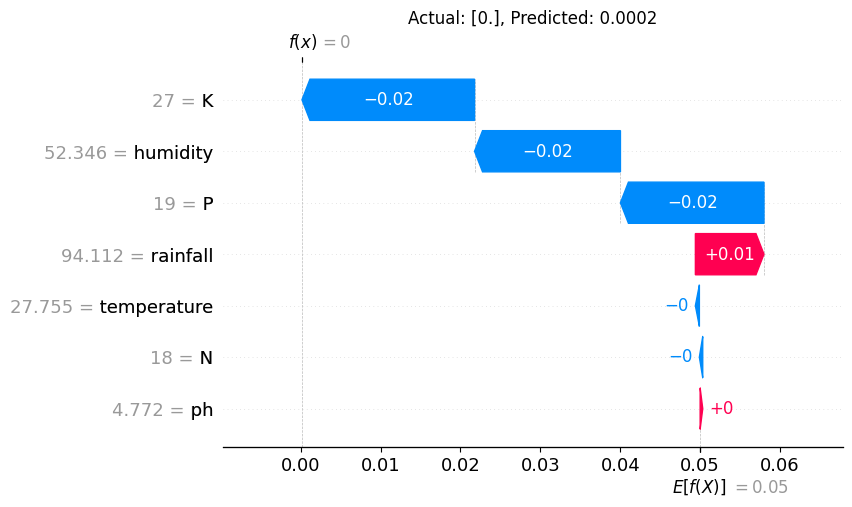

Instance 7:
Actual: [1.] | Predicted: 0.9887


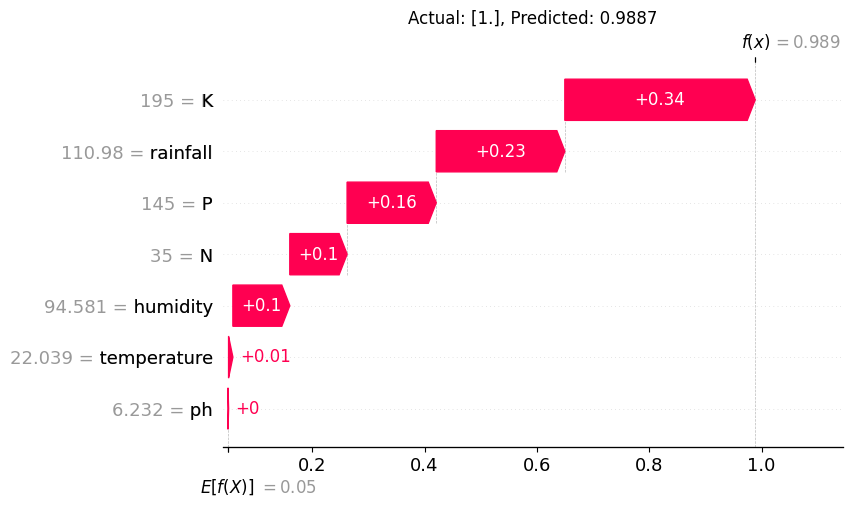

Instance 8:
Actual: [0.] | Predicted: 0.0001


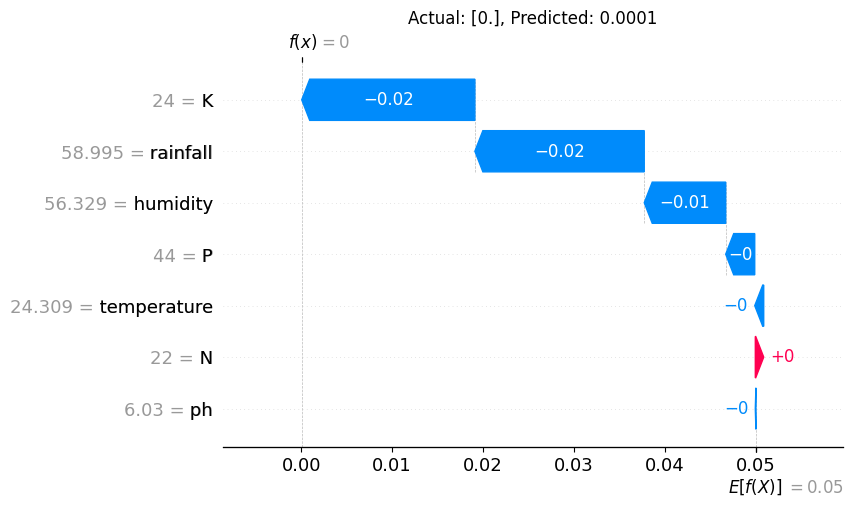

Instance 9:
Actual: [0.] | Predicted: 0.0001


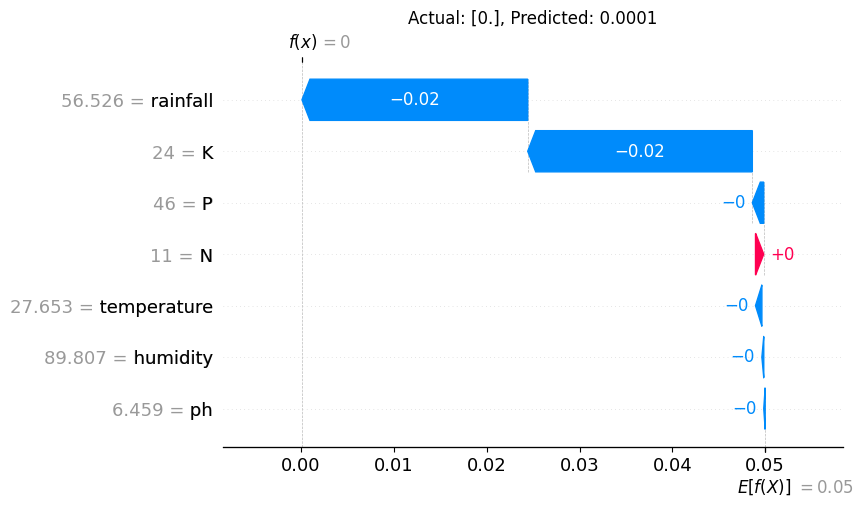

Instance 10:
Actual: [0.] | Predicted: 0.0001


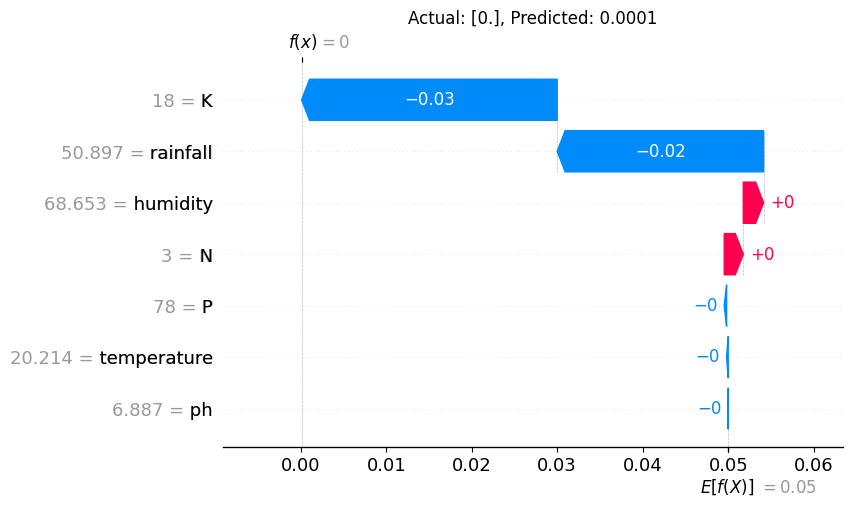

Instance 11:
Actual: [0.] | Predicted: 0.0003


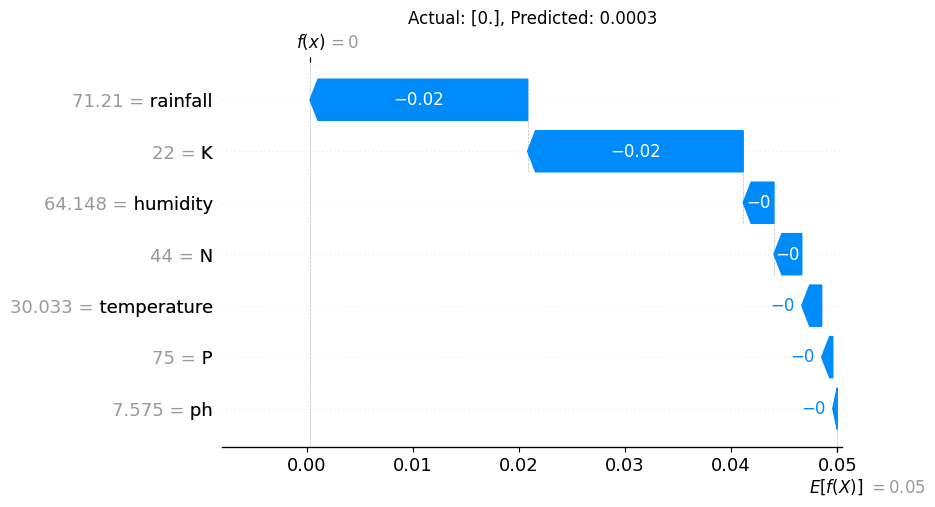

Instance 12:
Actual: [0.] | Predicted: 0.0004


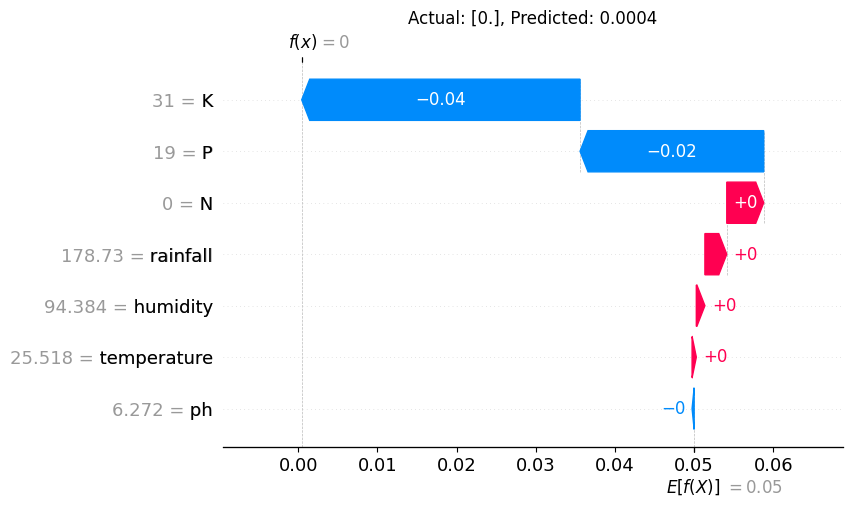

Instance 13:
Actual: [0.] | Predicted: 0.0001


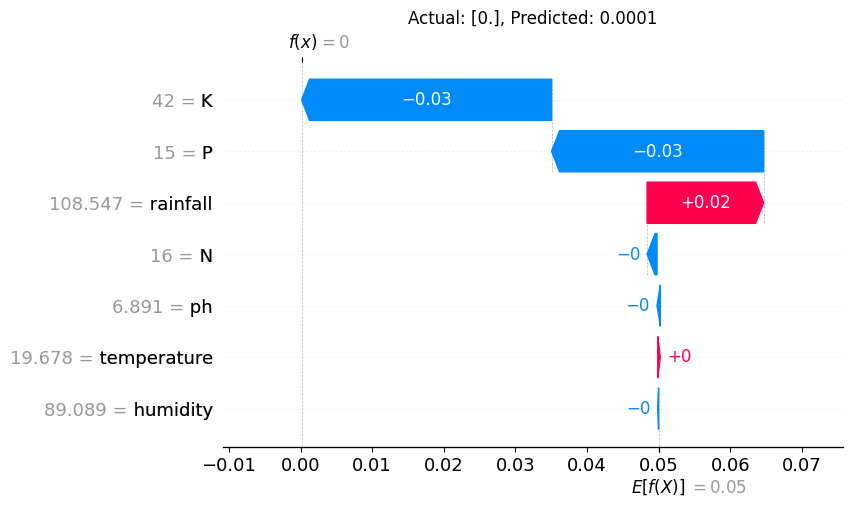

Instance 14:
Actual: [0.] | Predicted: 0.0007


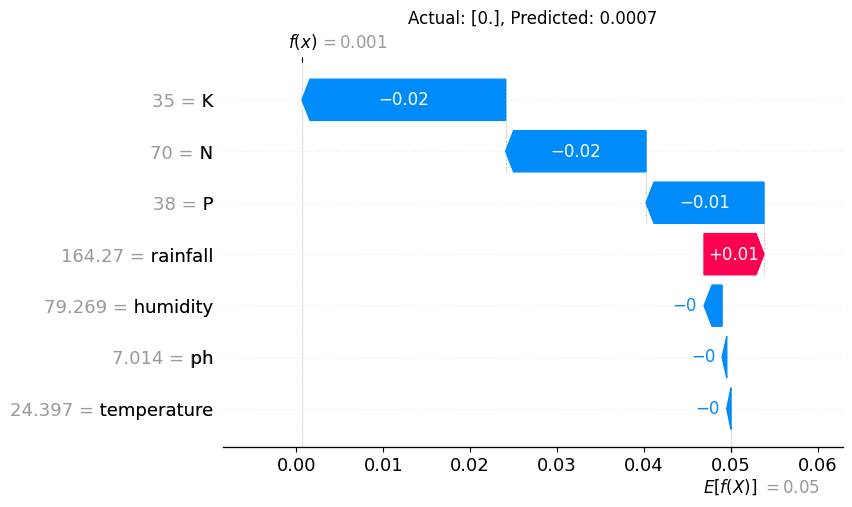

Instance 15:
Actual: [0.] | Predicted: 0.0004


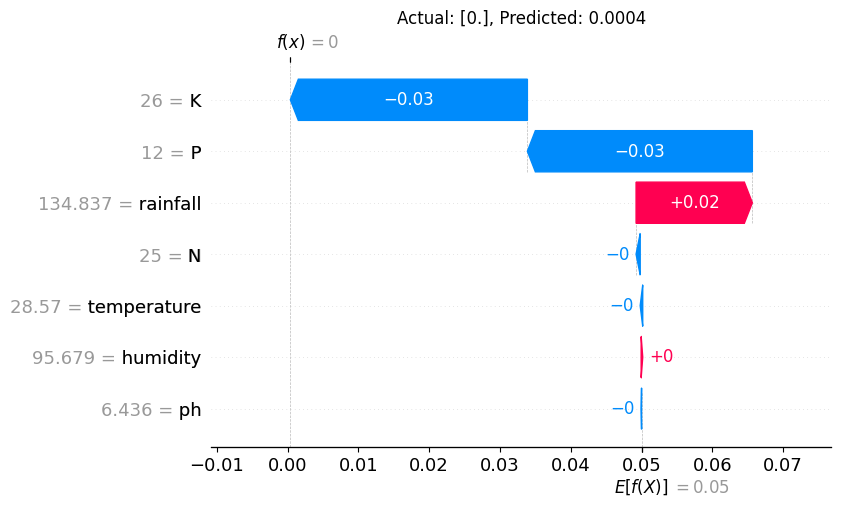

Instance 16:
Actual: [0.] | Predicted: 0.0002


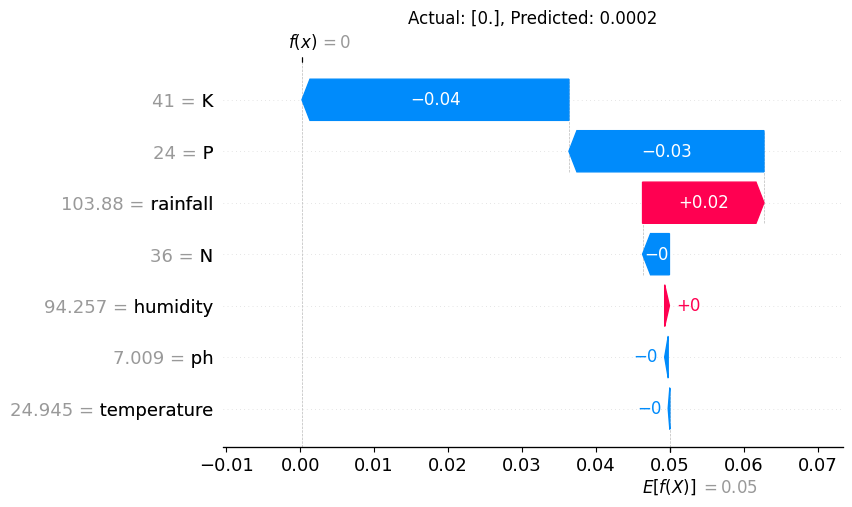

Instance 17:
Actual: [1.] | Predicted: 0.9947


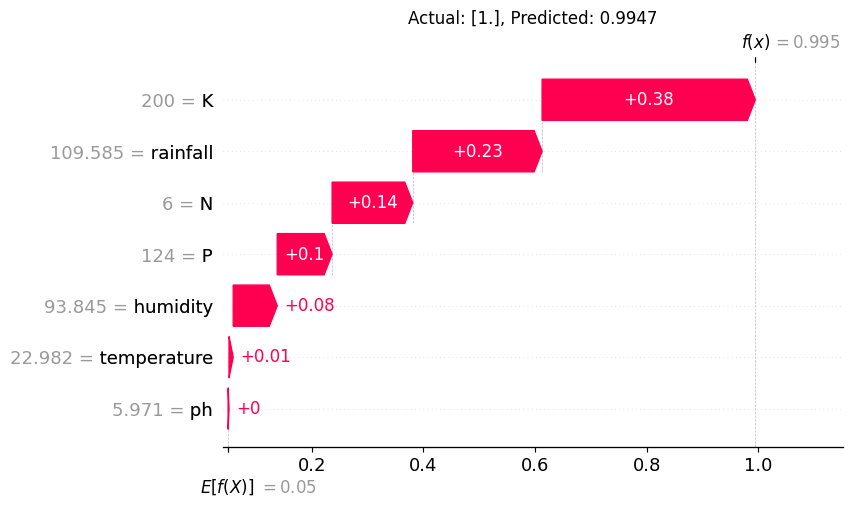

Instance 18:
Actual: [0.] | Predicted: 0.0004


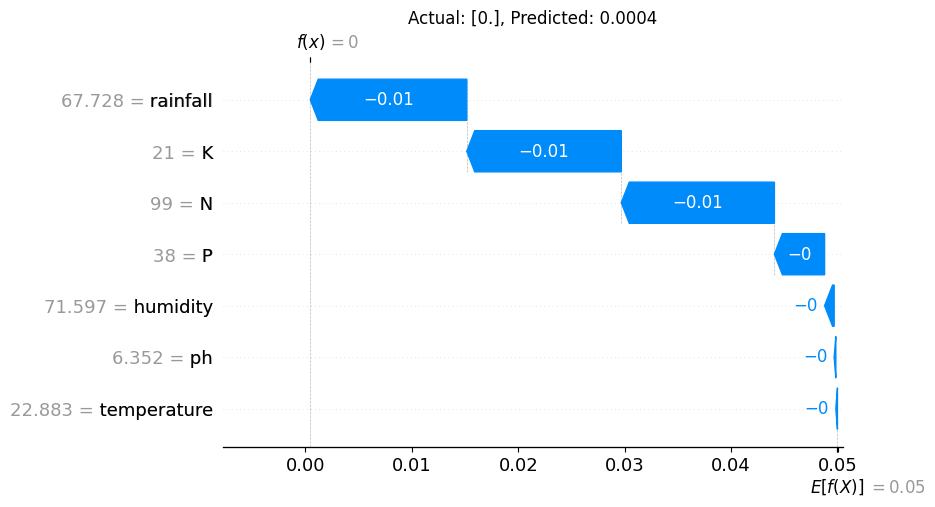

Instance 19:
Actual: [0.] | Predicted: 0.0007


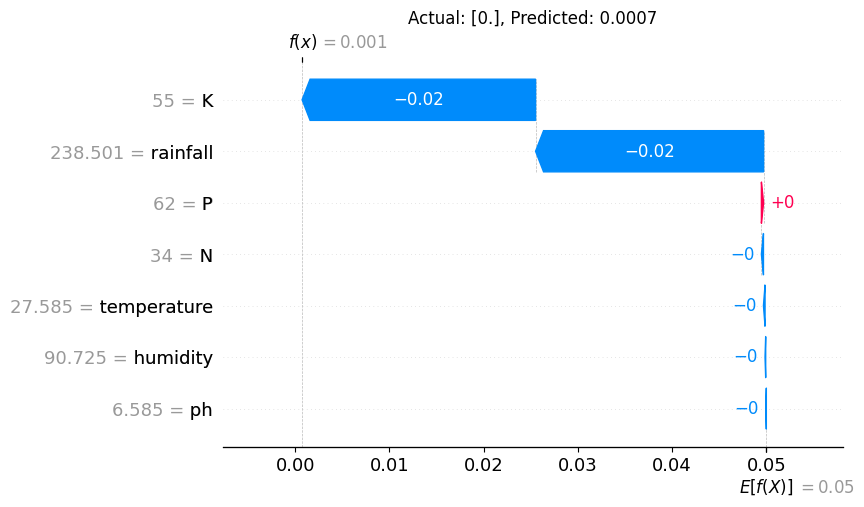

Instance 20:
Actual: [0.] | Predicted: 0.0003


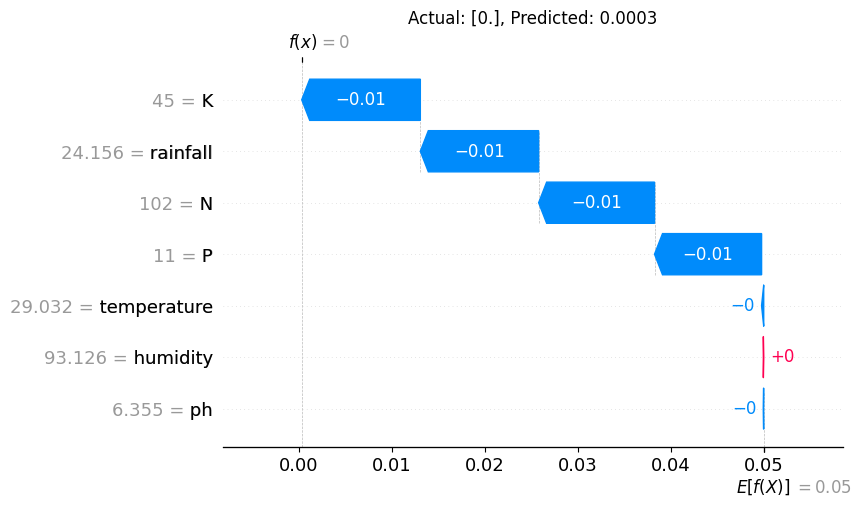

Instance 21:
Actual: [0.] | Predicted: 0.0009


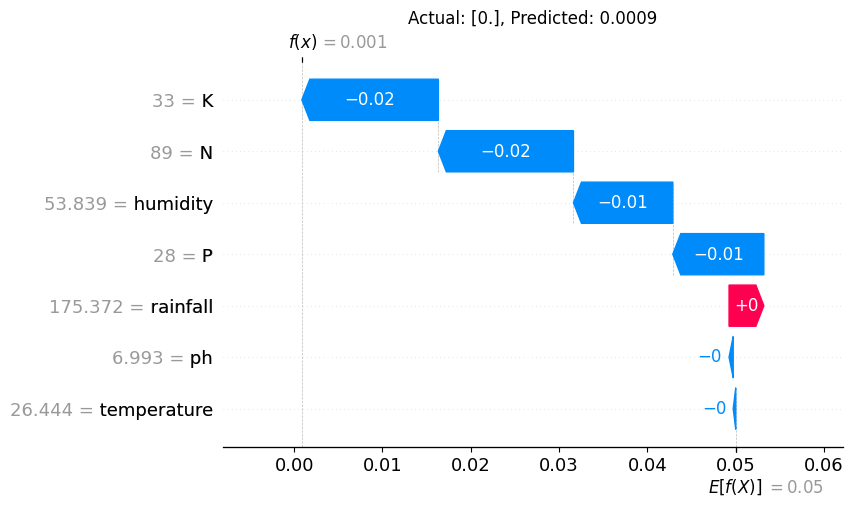

Instance 22:
Actual: [0.] | Predicted: 0.0002


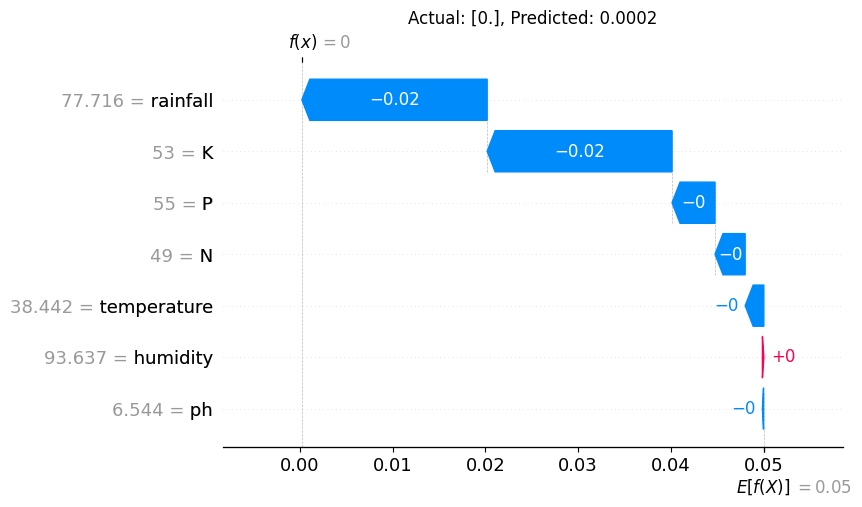

Instance 23:
Actual: [0.] | Predicted: 0.0003


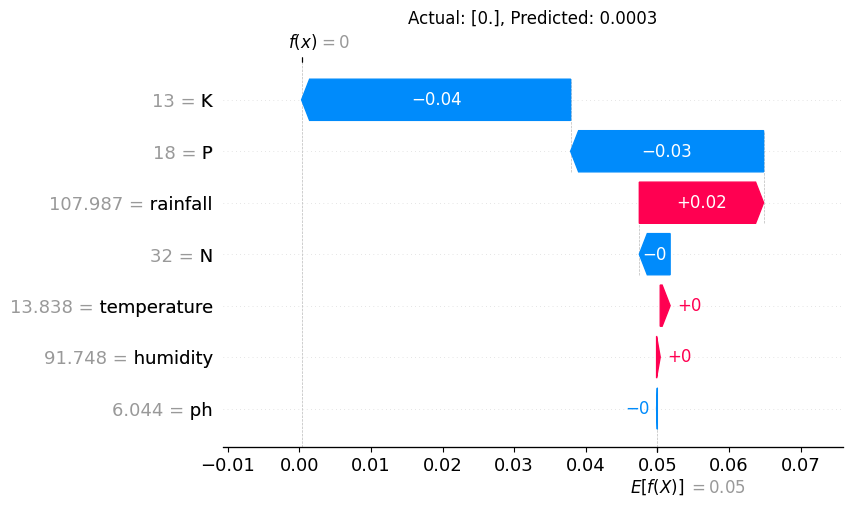

Instance 24:
Actual: [0.] | Predicted: 0.0006


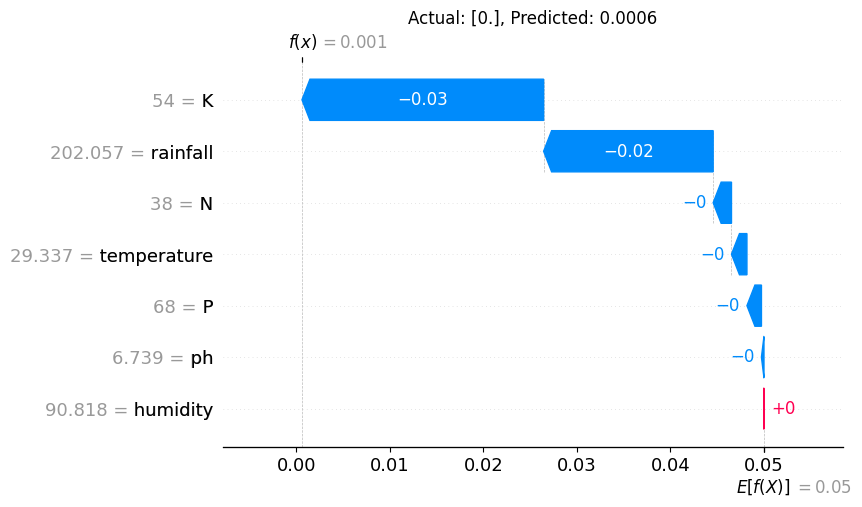

Instance 25:
Actual: [0.] | Predicted: 0.0000


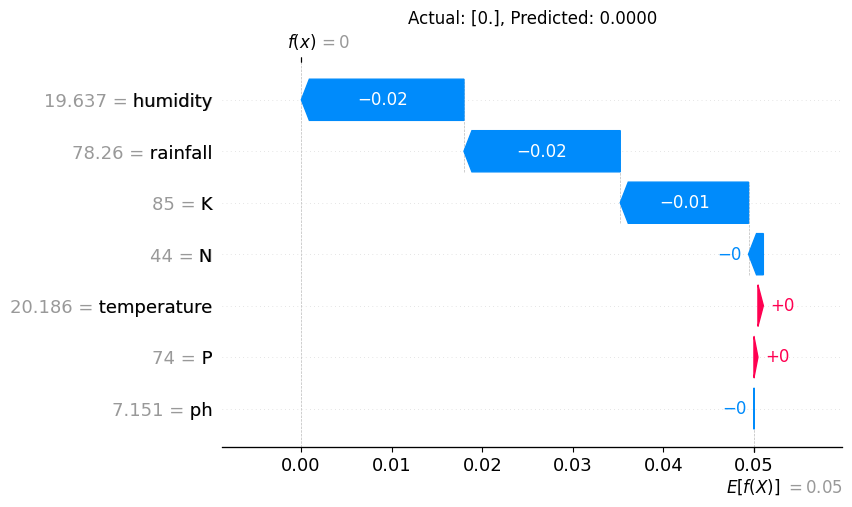

Instance 26:
Actual: [0.] | Predicted: 0.0007


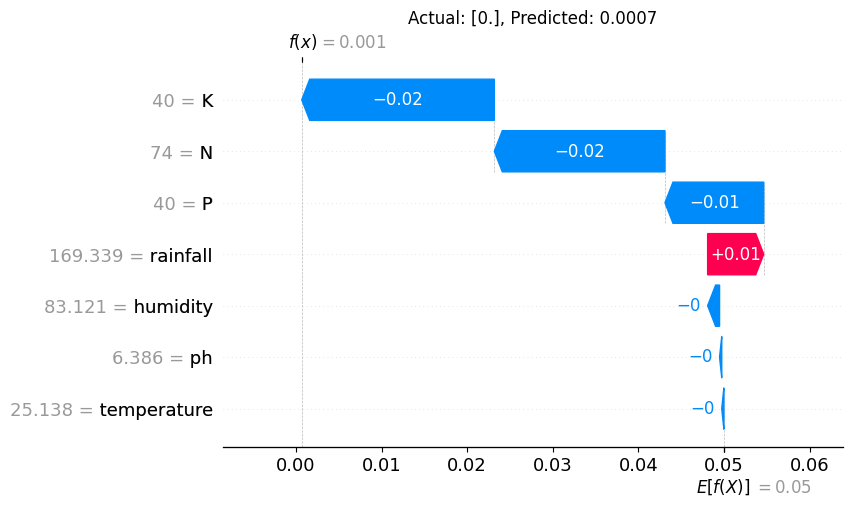

Instance 27:
Actual: [0.] | Predicted: 0.0002


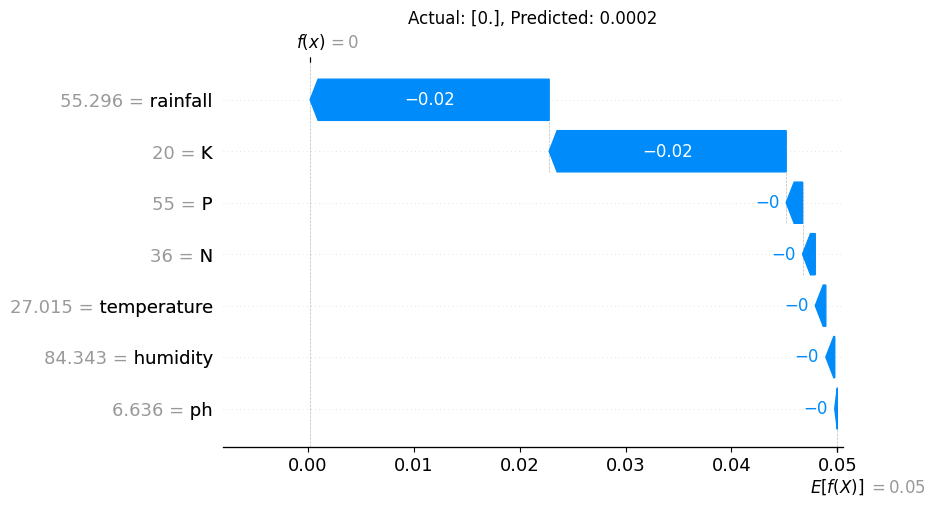

Instance 28:
Actual: [0.] | Predicted: 0.0004


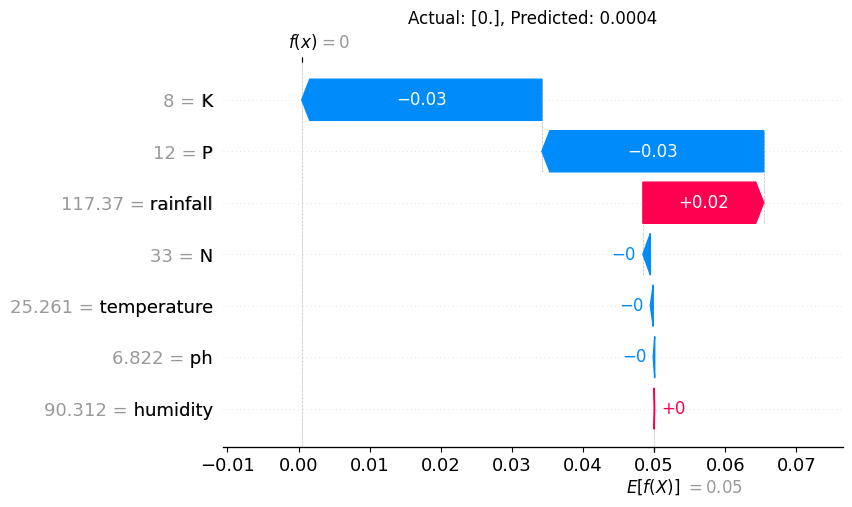

Instance 29:
Actual: [0.] | Predicted: 0.0005


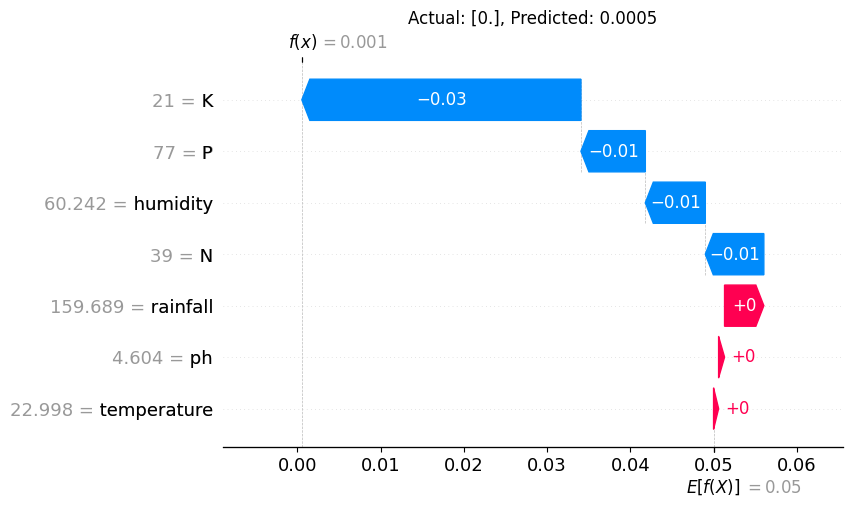

Instance 30:
Actual: [0.] | Predicted: 0.0009


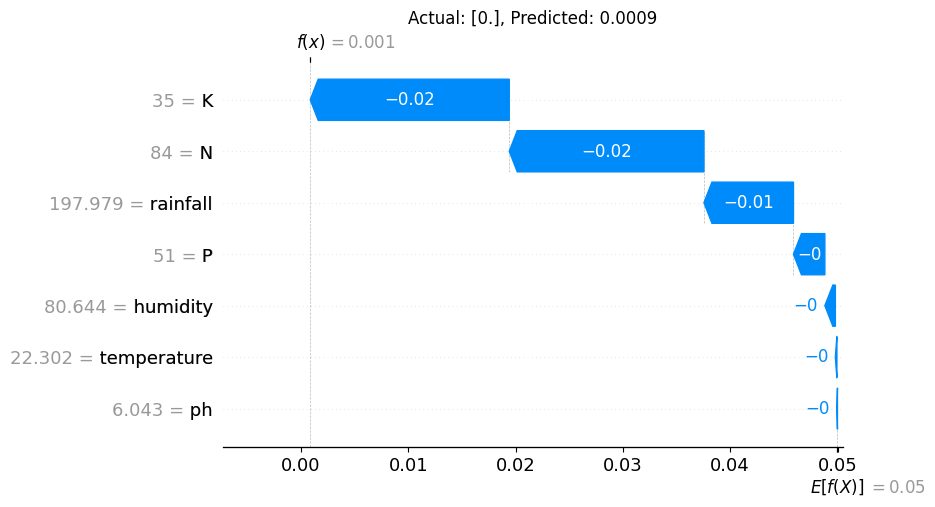

Instance 31:
Actual: [0.] | Predicted: 0.0001


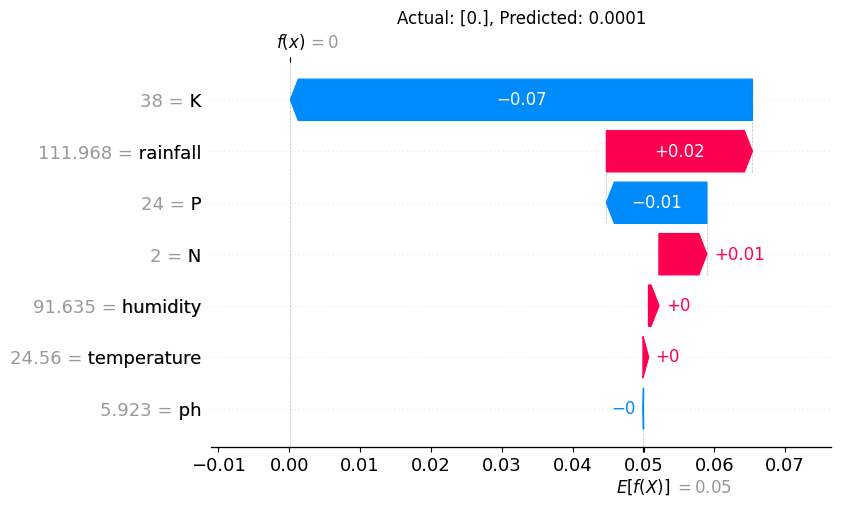

Instance 32:
Actual: [0.] | Predicted: 0.0001


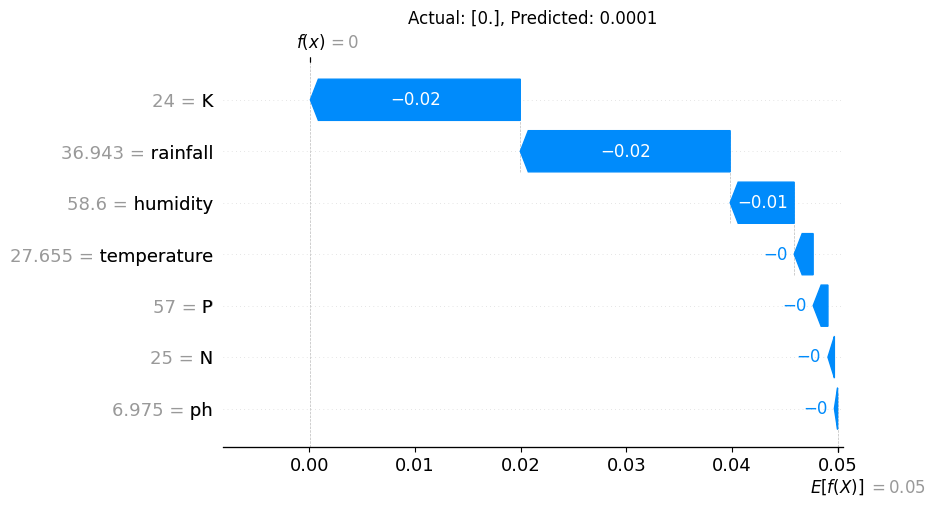

Instance 33:
Actual: [0.] | Predicted: 0.0009


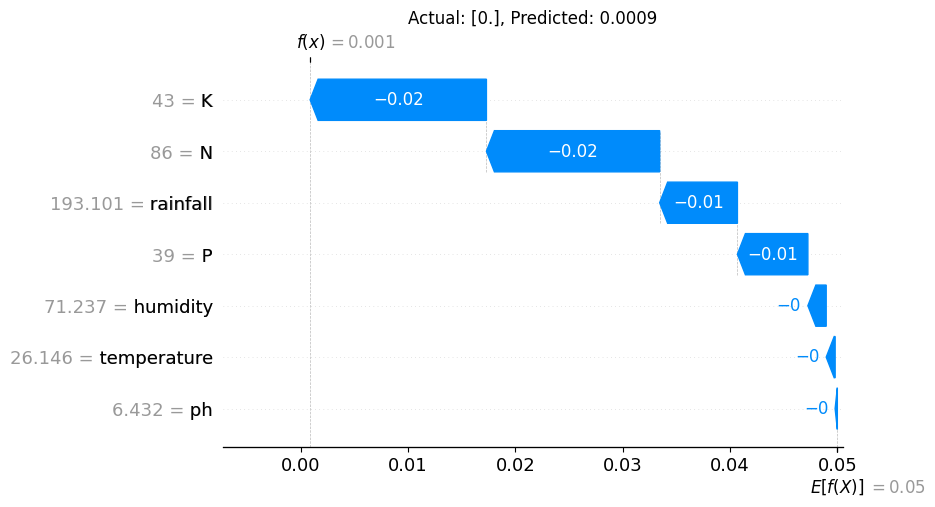

Instance 34:
Actual: [0.] | Predicted: 0.0001


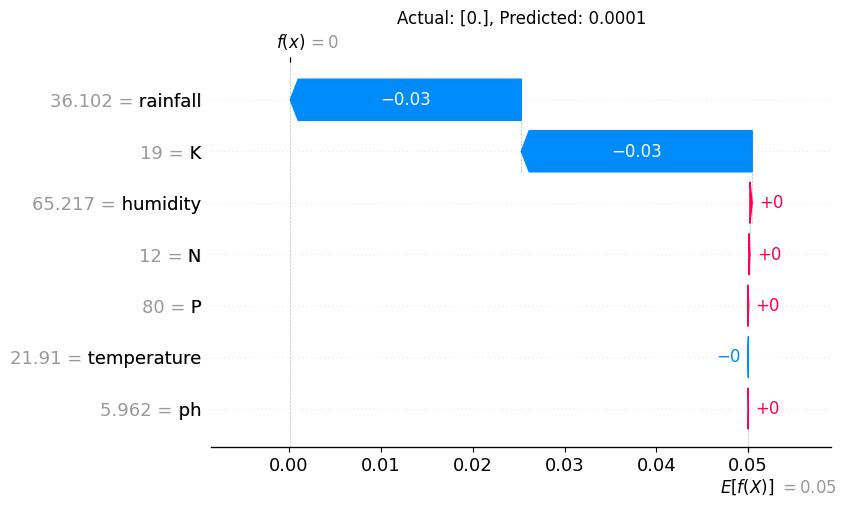

Instance 35:
Actual: [0.] | Predicted: 0.0009


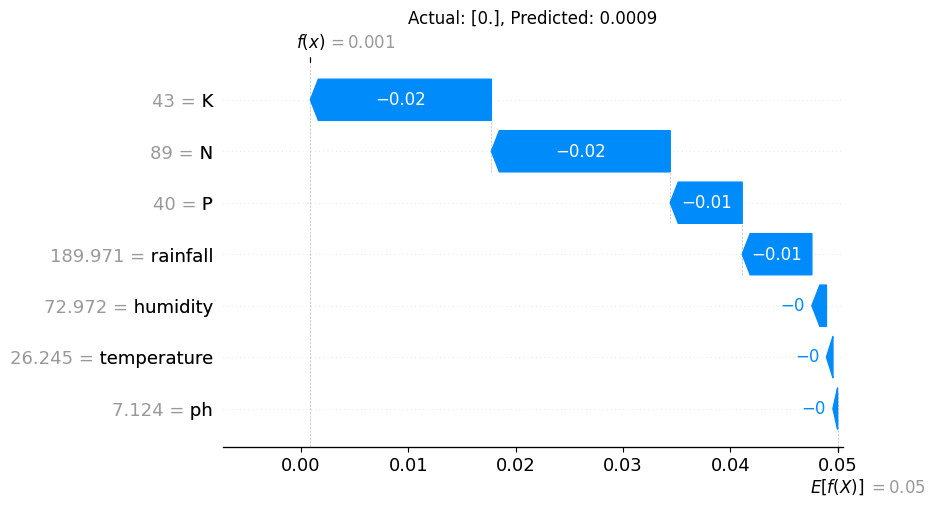

Instance 36:
Actual: [0.] | Predicted: 0.0002


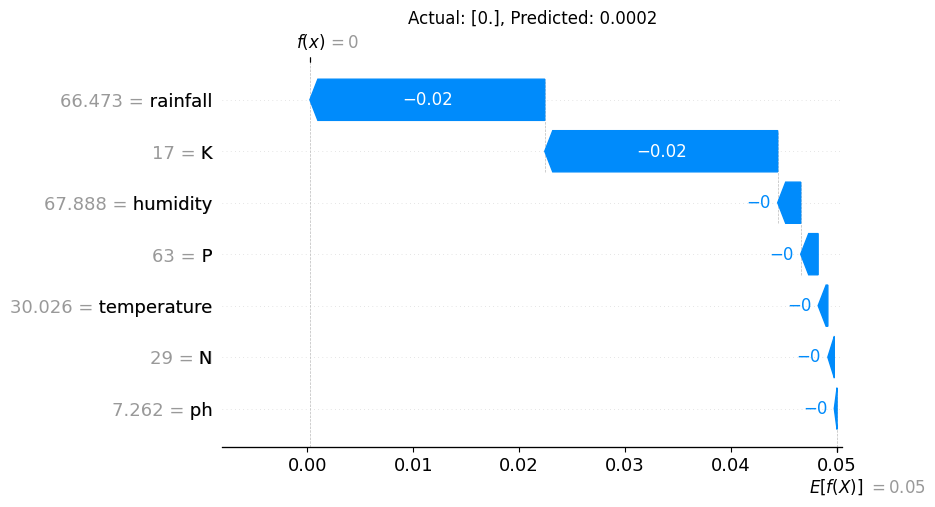

Instance 37:
Actual: [0.] | Predicted: 0.0008


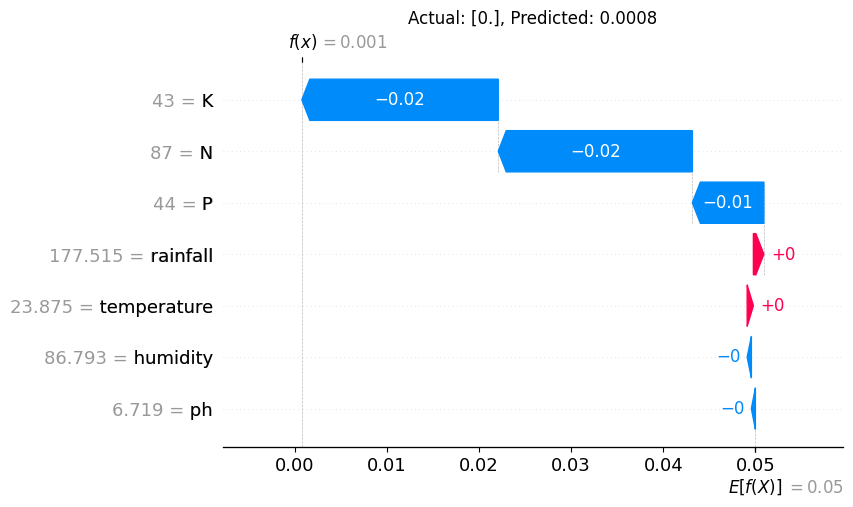

Instance 38:
Actual: [0.] | Predicted: -0.0001


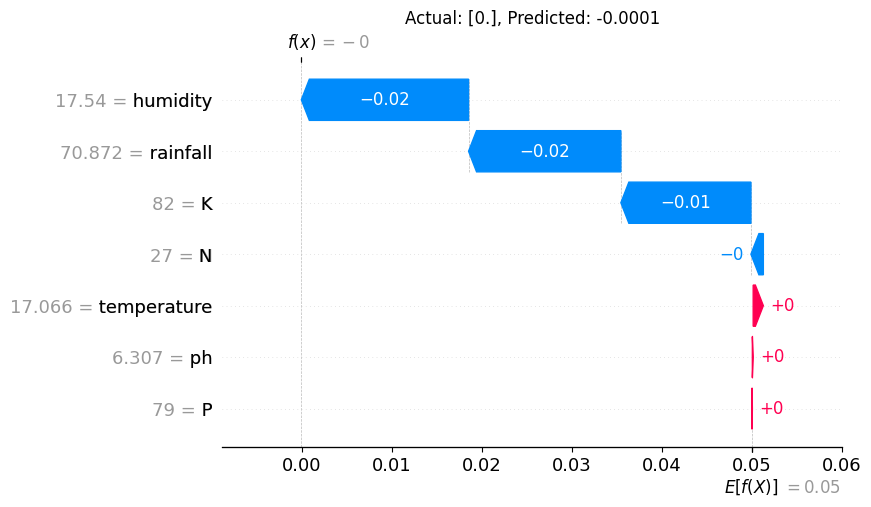

Instance 39:
Actual: [0.] | Predicted: -0.0000


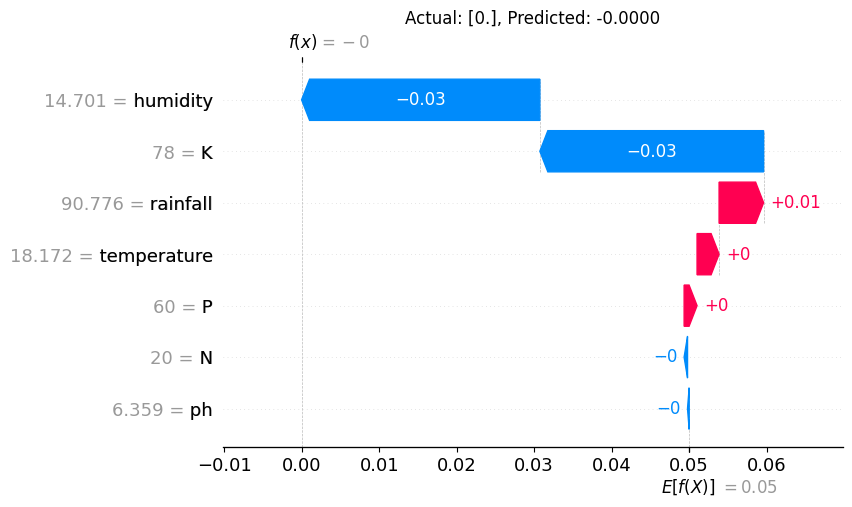

Instance 40:
Actual: [0.] | Predicted: 0.0001


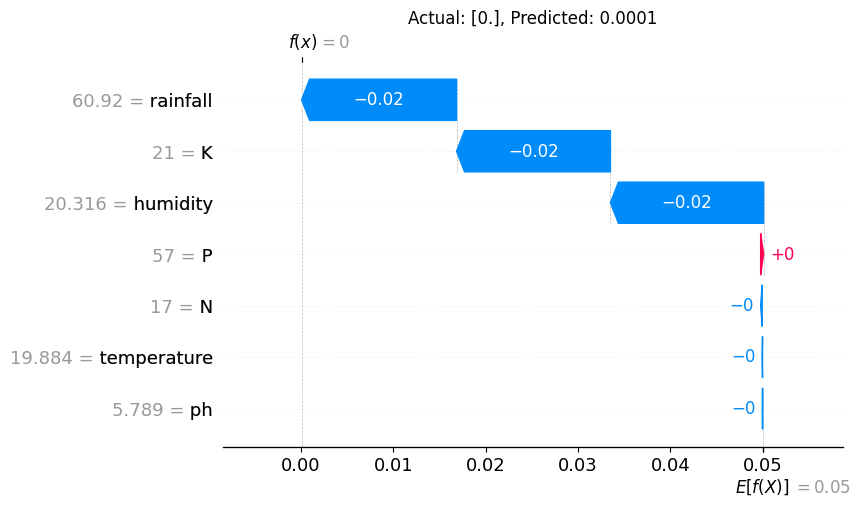

Instance 41:
Actual: [0.] | Predicted: 0.0008


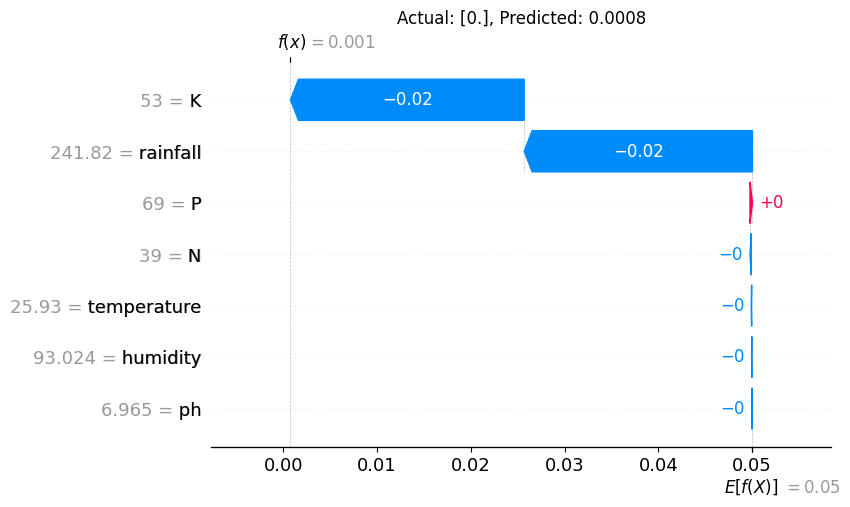

Instance 42:
Actual: [0.] | Predicted: 0.0002


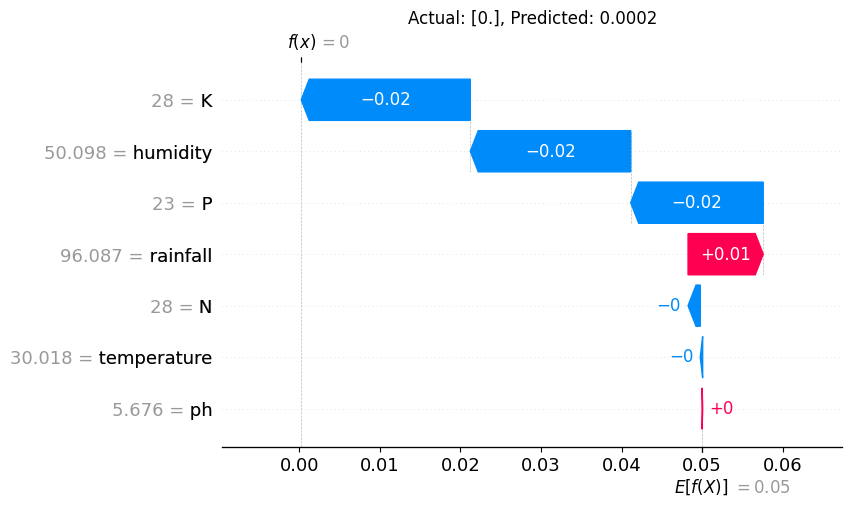

Instance 43:
Actual: [0.] | Predicted: 0.0002


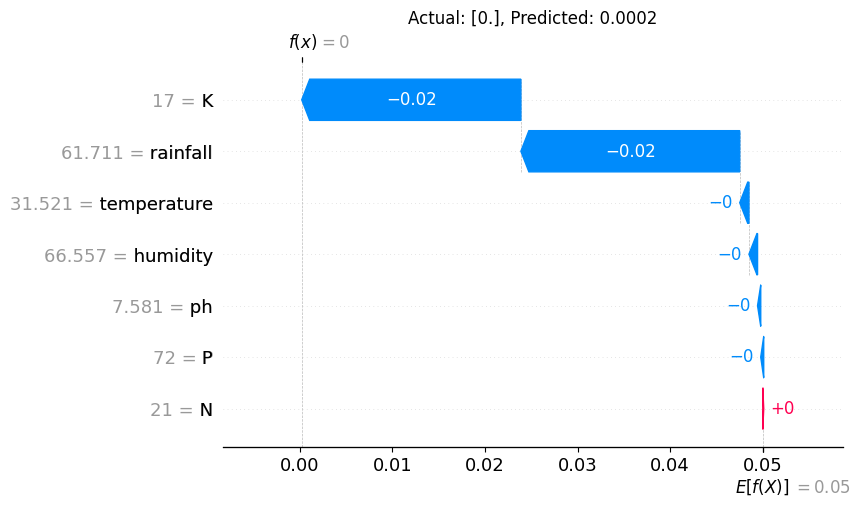

Instance 44:
Actual: [0.] | Predicted: 0.0003


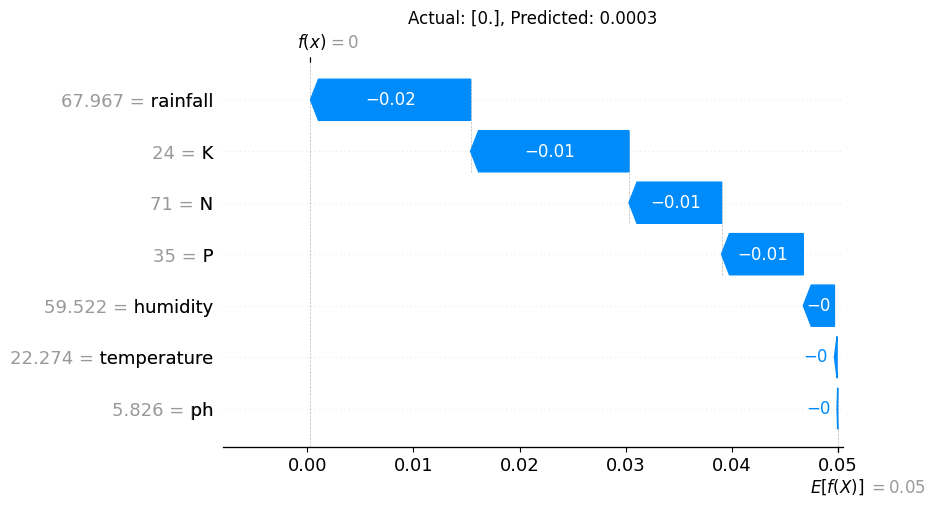

Instance 45:
Actual: [0.] | Predicted: 0.0001


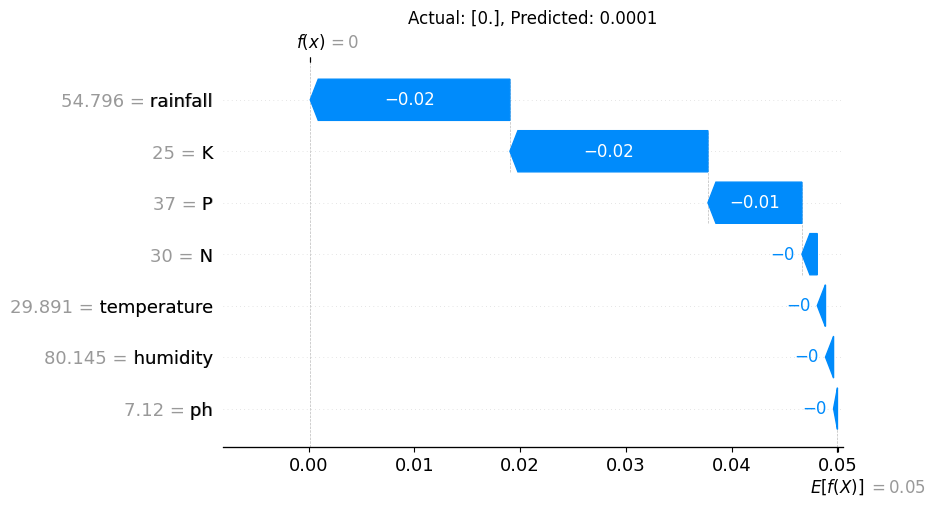

Instance 46:
Actual: [0.] | Predicted: 0.0005


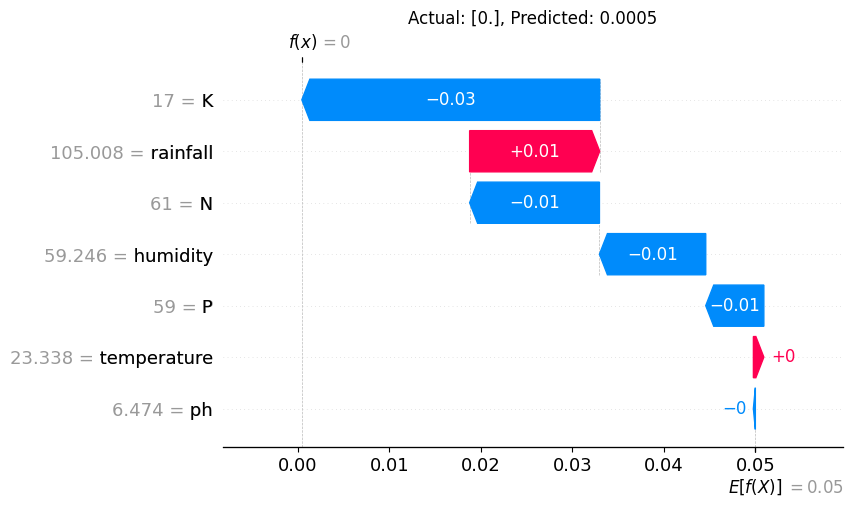

Instance 47:
Actual: [0.] | Predicted: 0.0004


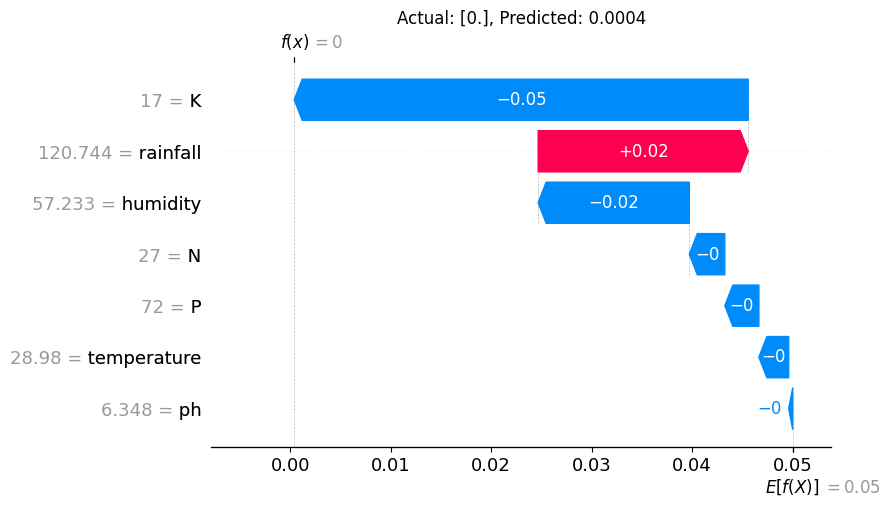

Instance 48:
Actual: [0.] | Predicted: 0.0005


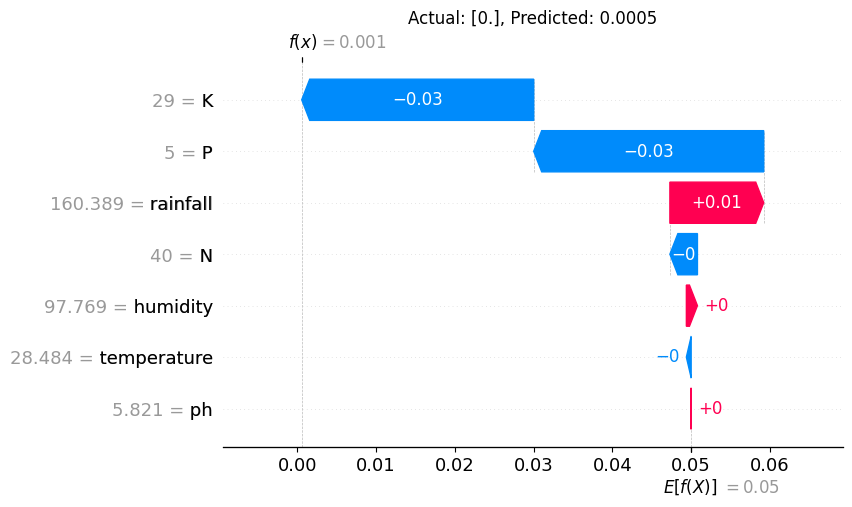

Instance 49:
Actual: [0.] | Predicted: 0.0003


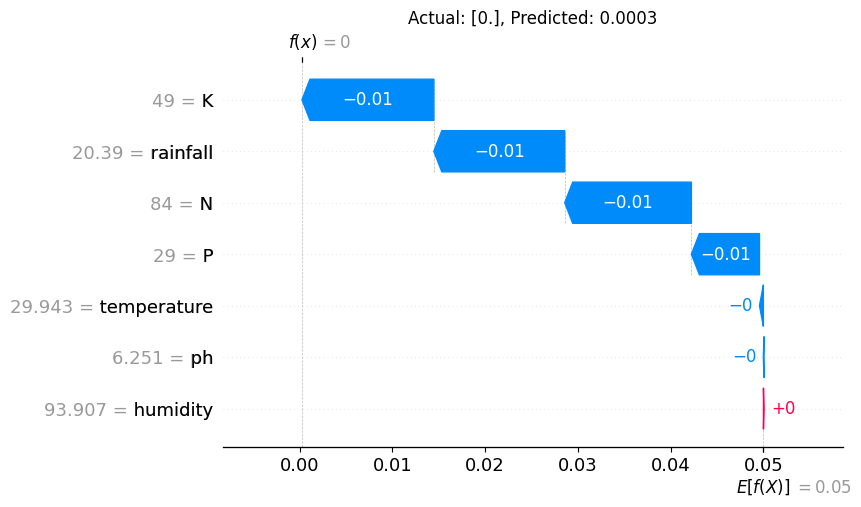

Instance 50:
Actual: [0.] | Predicted: 0.0005


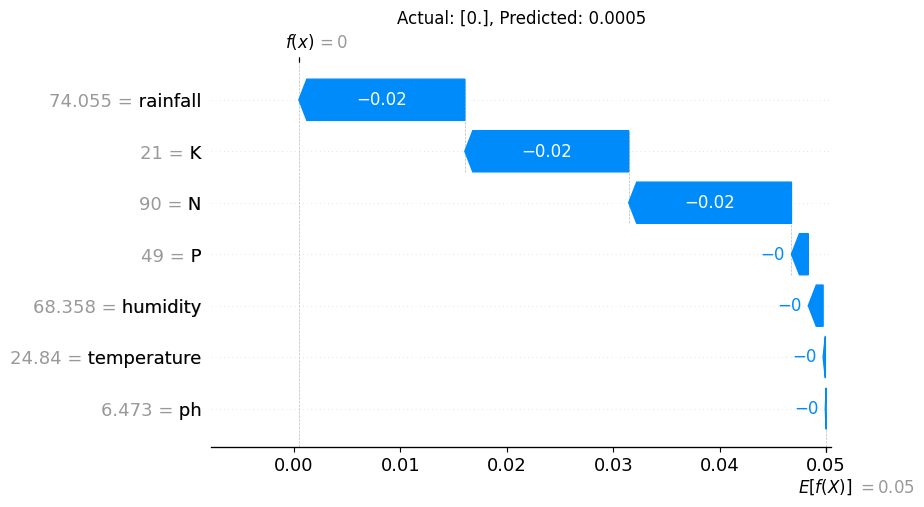

Instance 51:
Actual: [0.] | Predicted: 0.0003


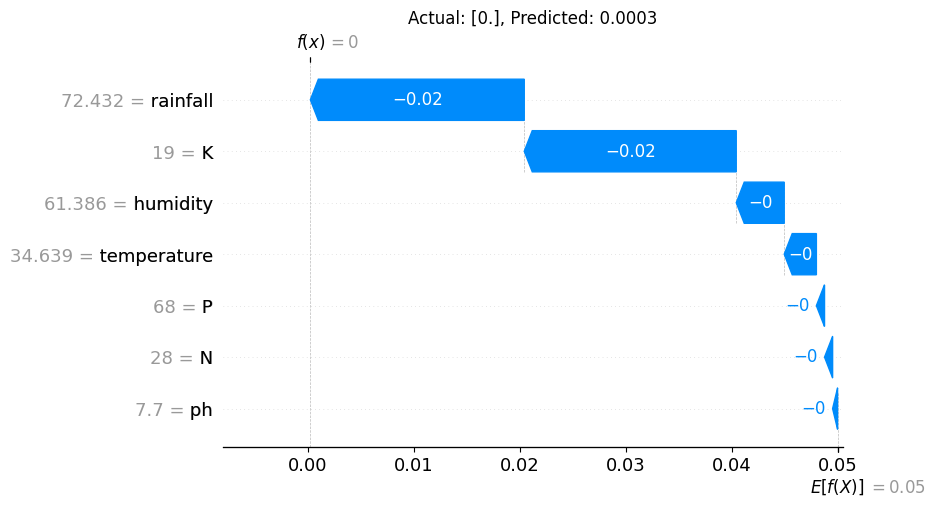

Instance 52:
Actual: [0.] | Predicted: 0.0007


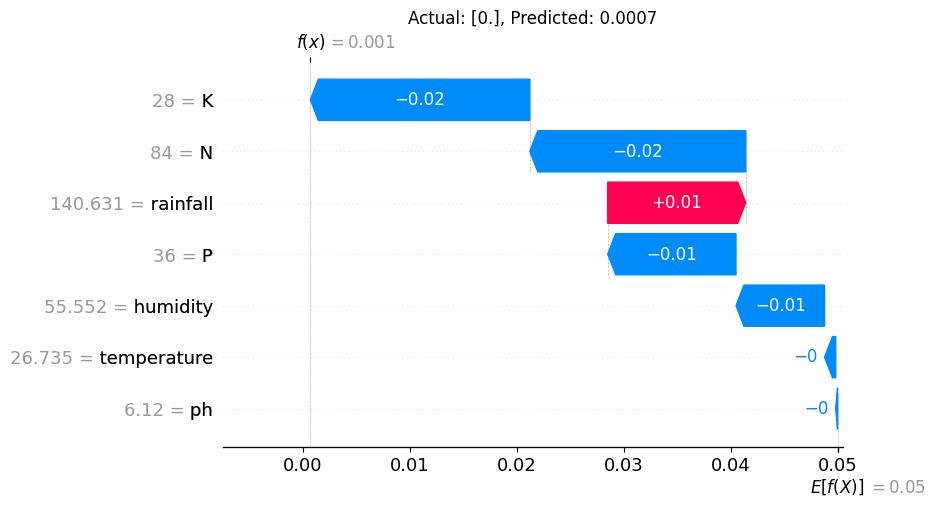

Instance 53:
Actual: [0.] | Predicted: 0.0002


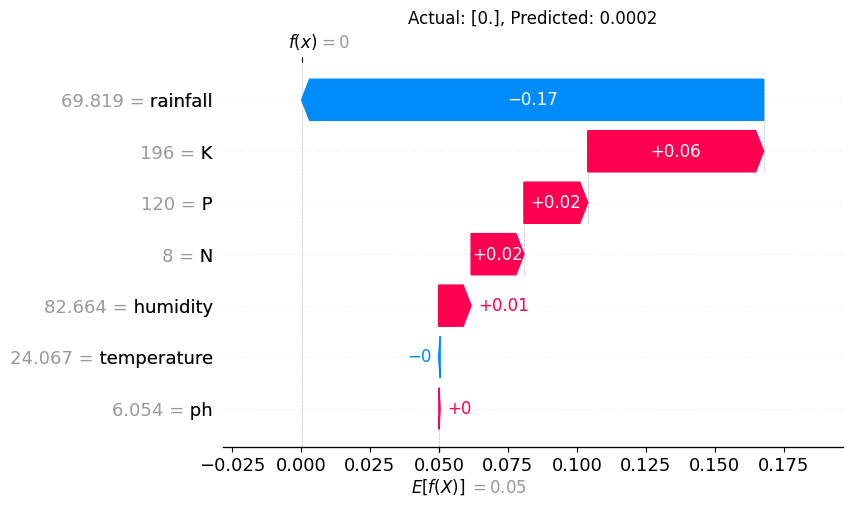

Instance 54:
Actual: [0.] | Predicted: 0.0001


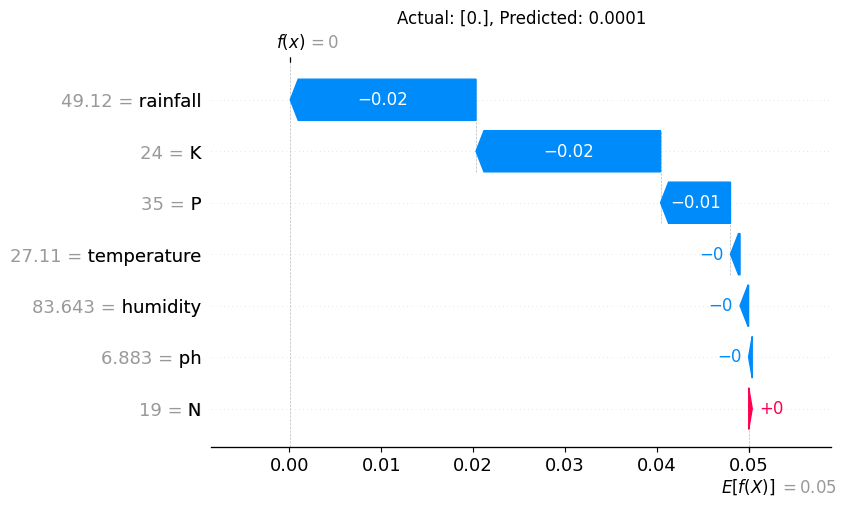

Instance 55:
Actual: [0.] | Predicted: 0.0007


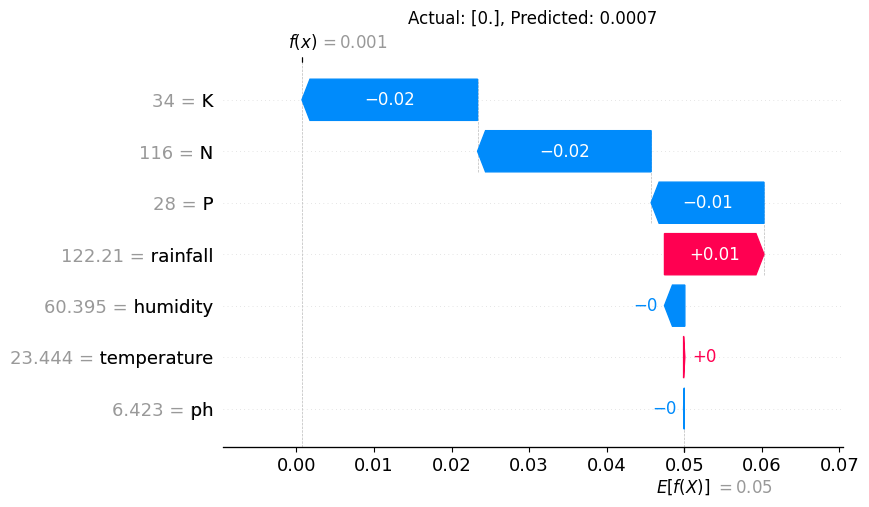

Instance 56:
Actual: [0.] | Predicted: 0.0002


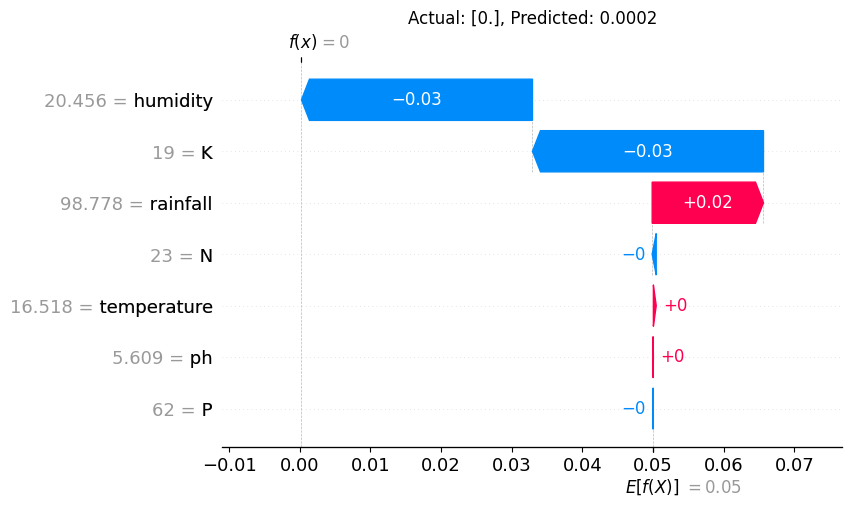

Instance 57:
Actual: [0.] | Predicted: 0.0005


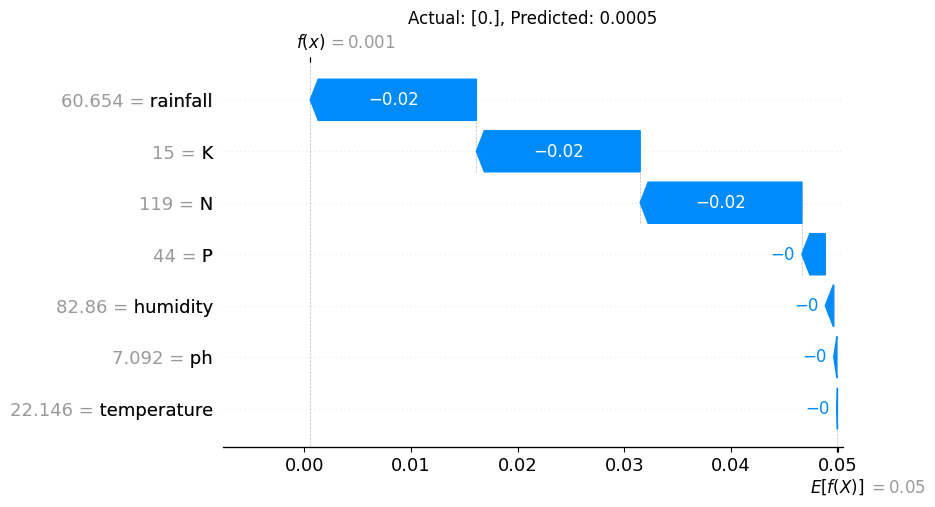

Instance 58:
Actual: [1.] | Predicted: 0.9943


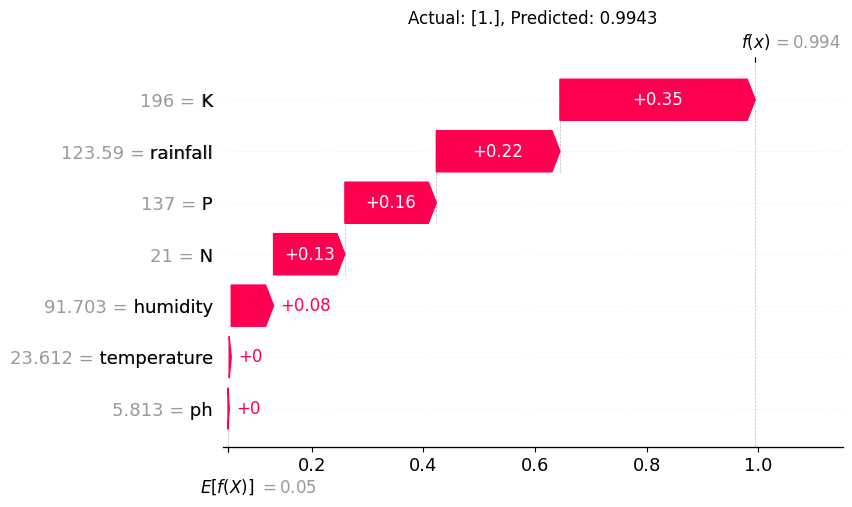

Instance 59:
Actual: [0.] | Predicted: 0.0005


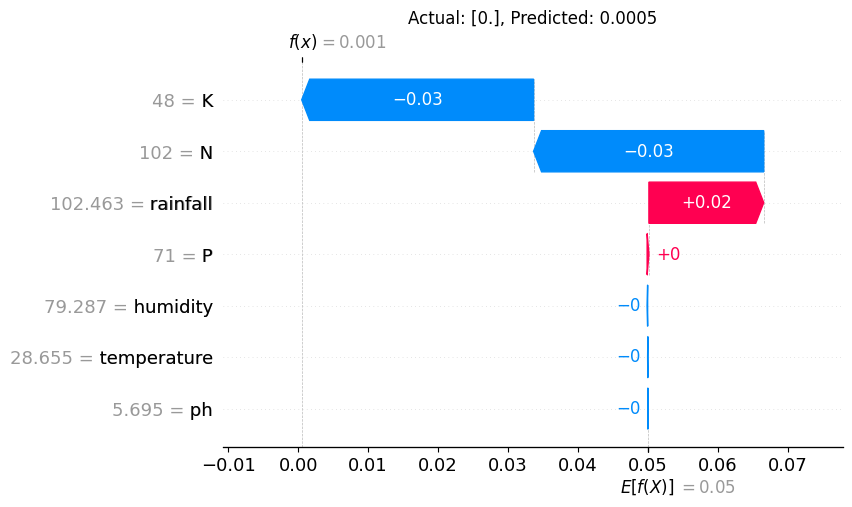

Instance 60:
Actual: [0.] | Predicted: 0.0001


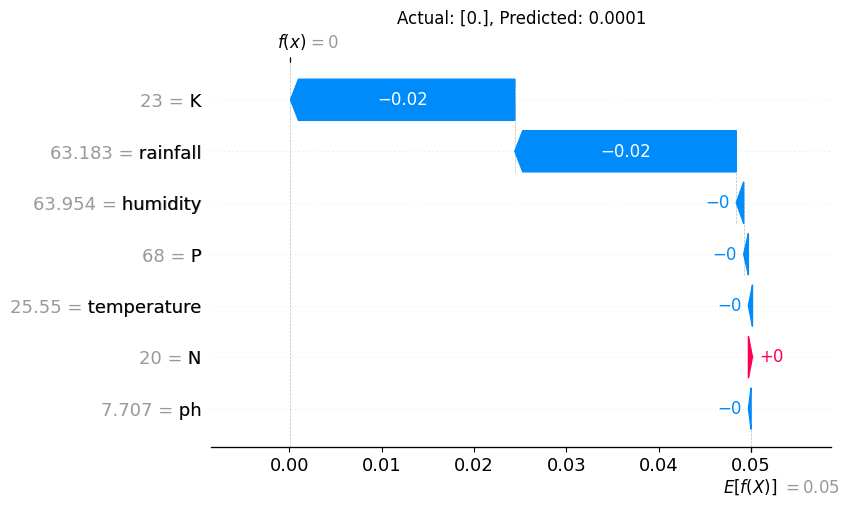

Instance 61:
Actual: [0.] | Predicted: 0.0003


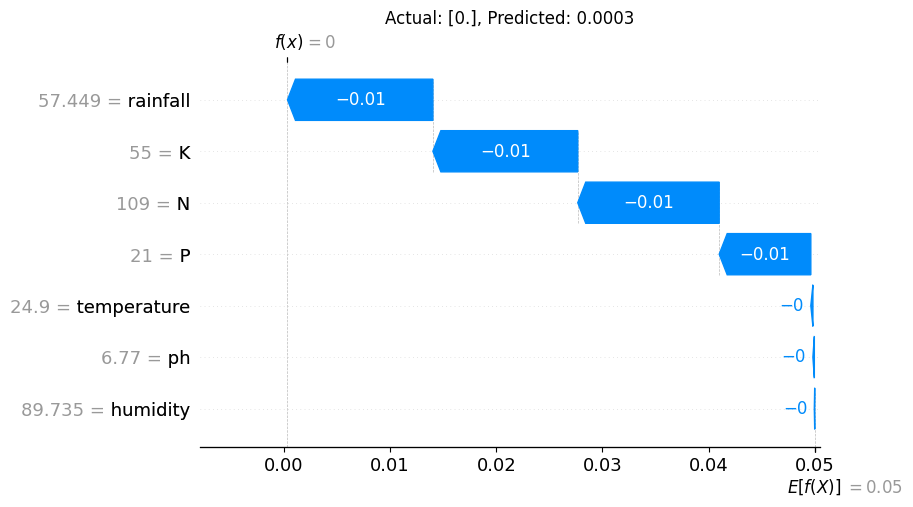

Instance 62:
Actual: [0.] | Predicted: 0.0003


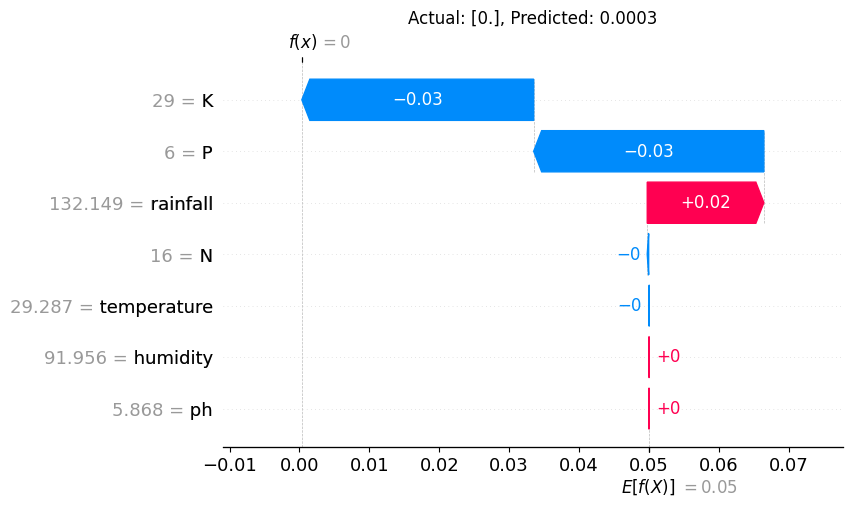

Instance 63:
Actual: [0.] | Predicted: 0.0001


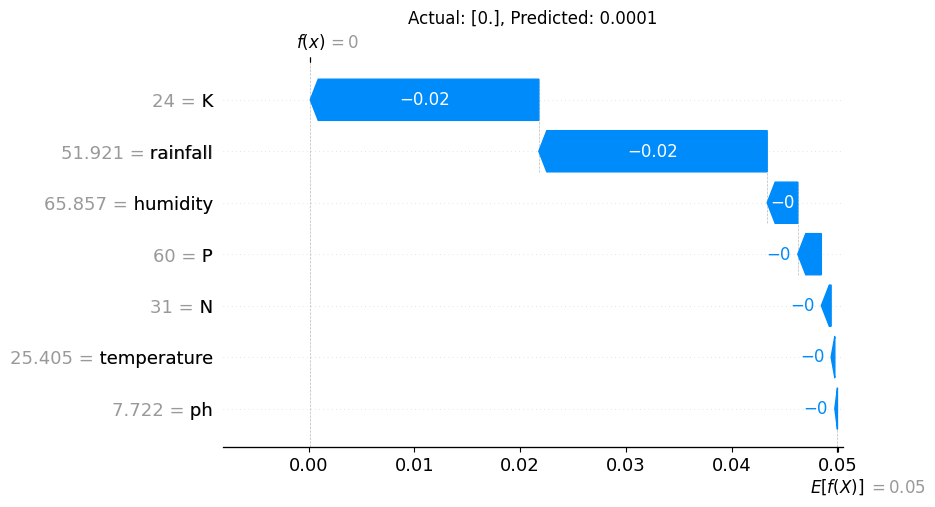

Instance 64:
Actual: [0.] | Predicted: 0.0003


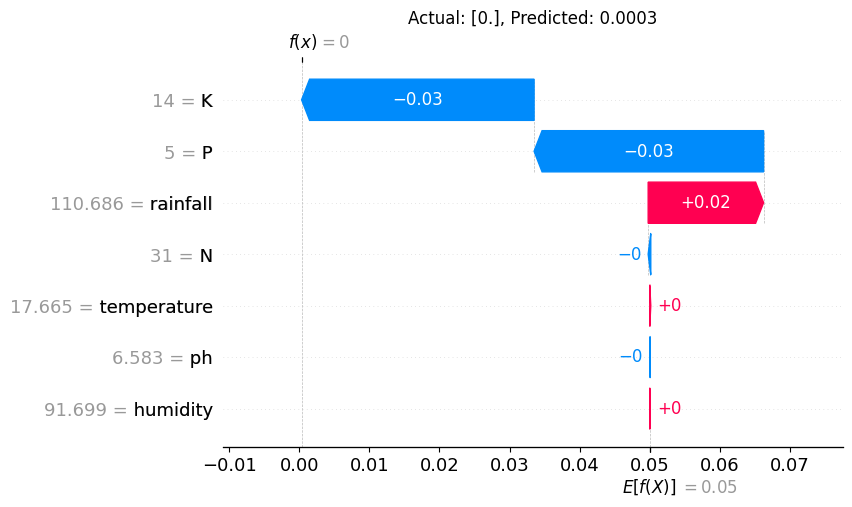

Instance 65:
Actual: [0.] | Predicted: 0.0001


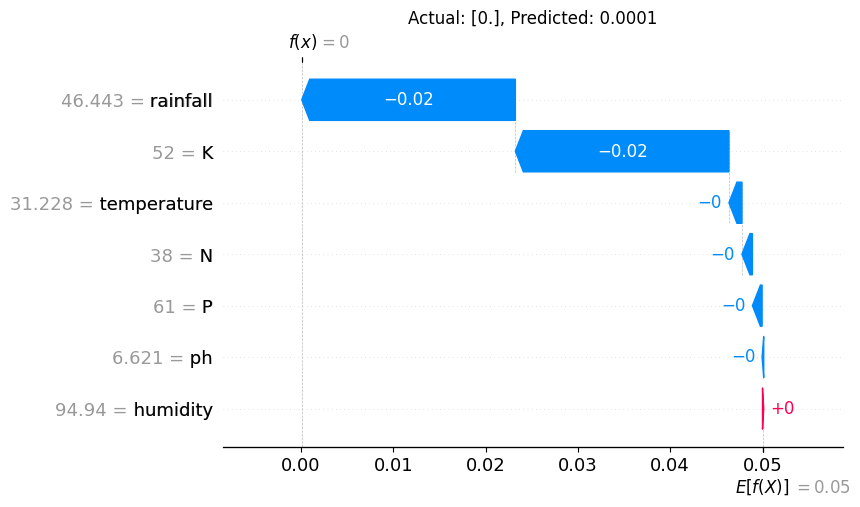

Instance 66:
Actual: [0.] | Predicted: 0.0003


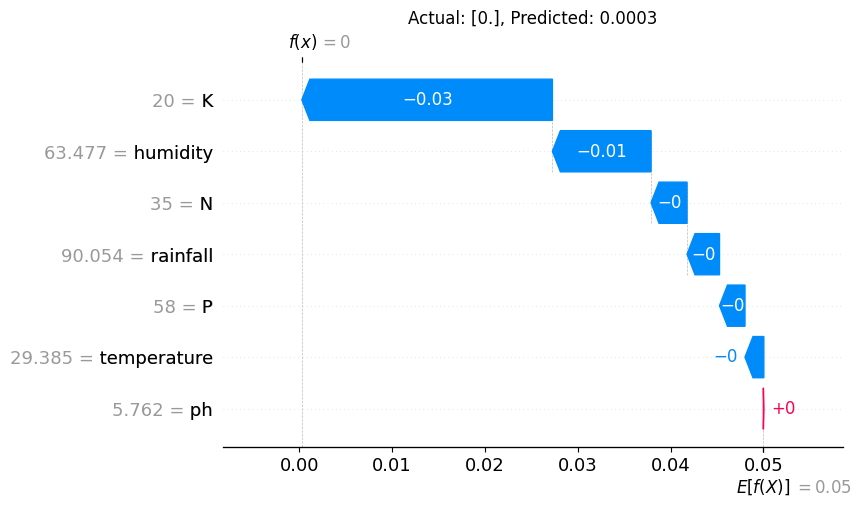

Instance 67:
Actual: [0.] | Predicted: 0.0004


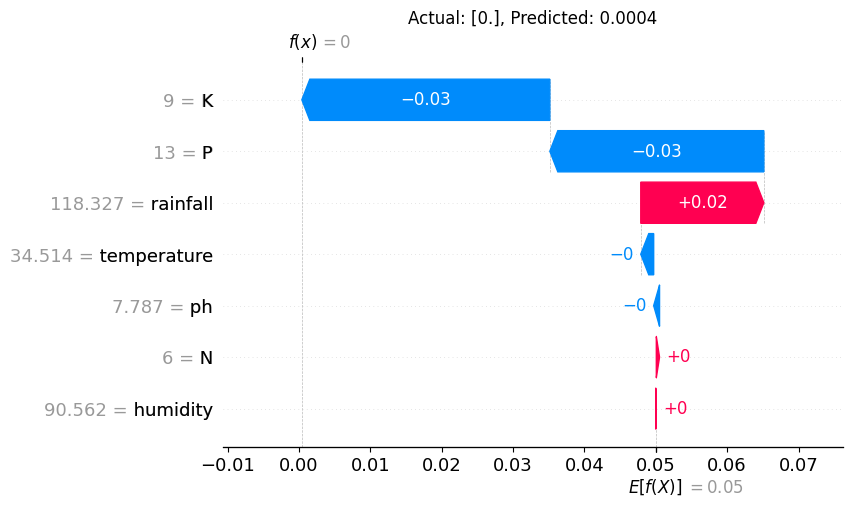

Instance 68:
Actual: [0.] | Predicted: 0.0014


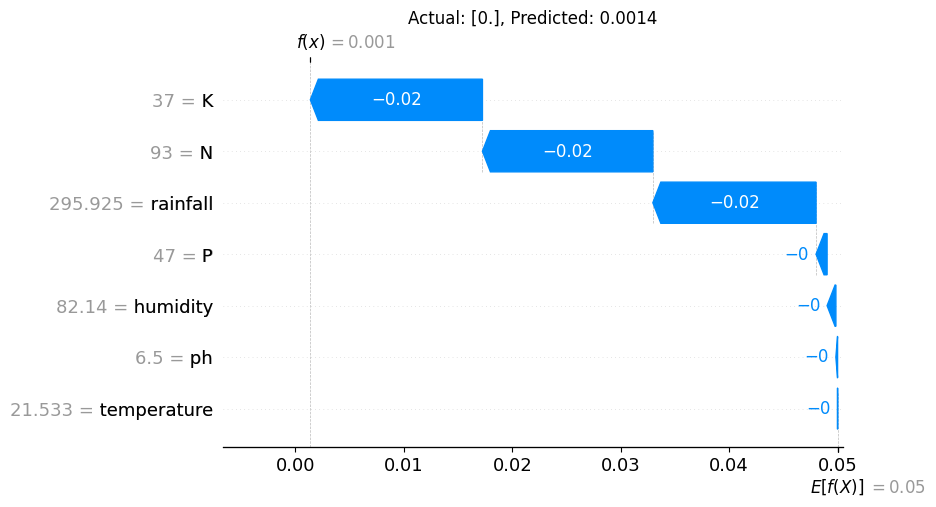

Instance 69:
Actual: [0.] | Predicted: 0.0002


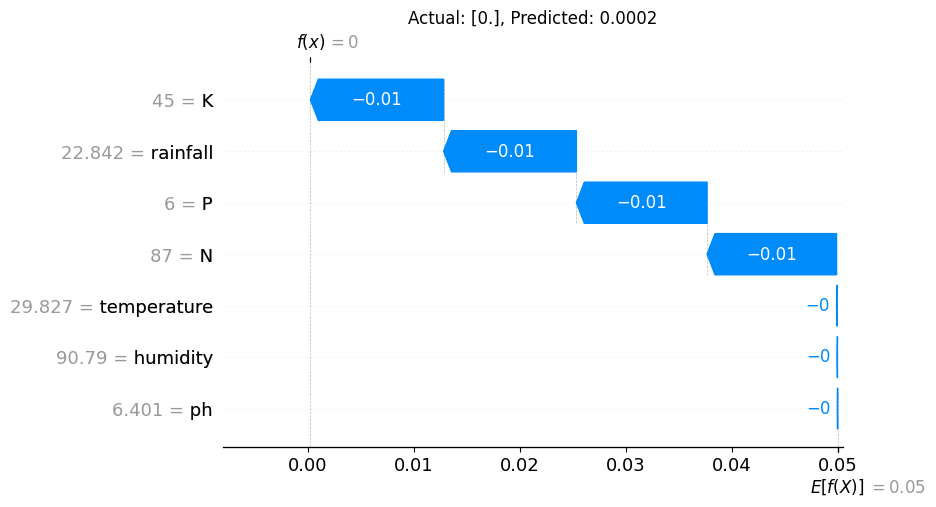

Instance 70:
Actual: [0.] | Predicted: 0.0006


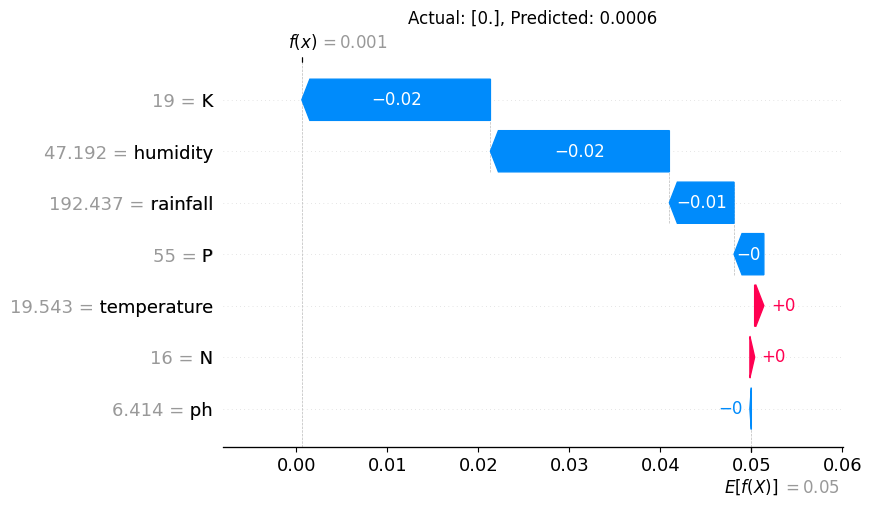

Instance 71:
Actual: [0.] | Predicted: 0.0004


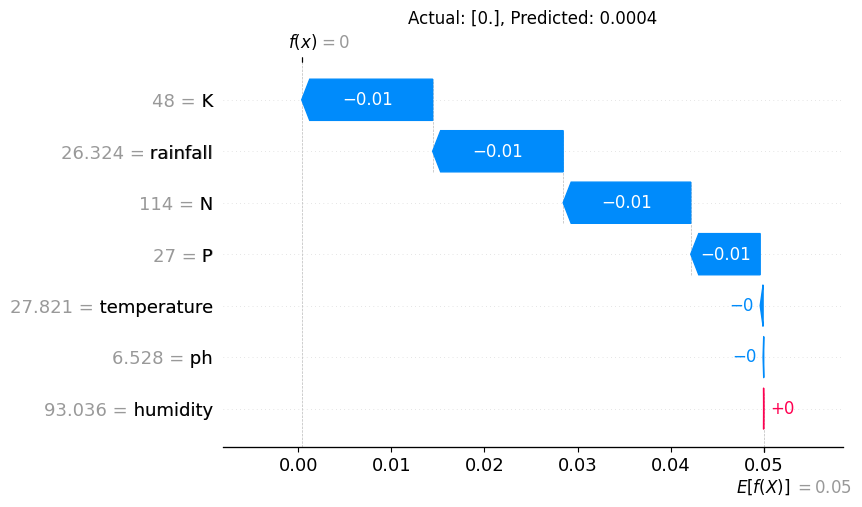

Instance 72:
Actual: [0.] | Predicted: 0.0005


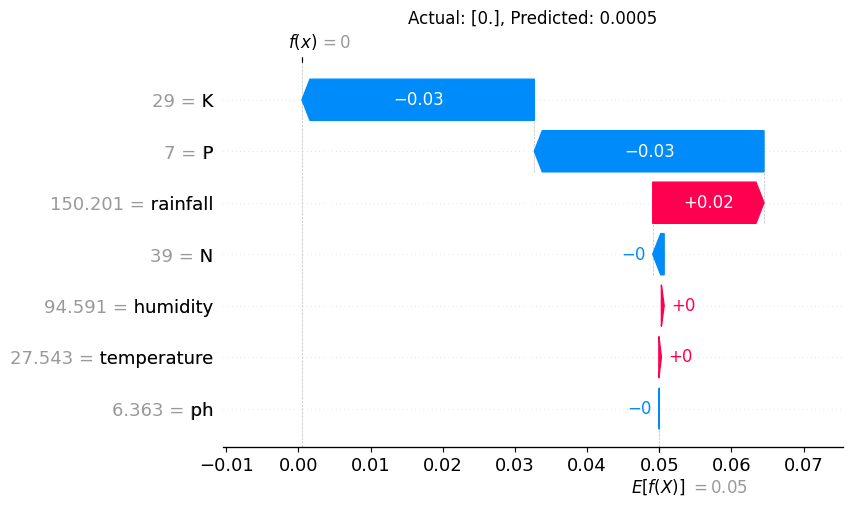

Instance 73:
Actual: [0.] | Predicted: 0.0007


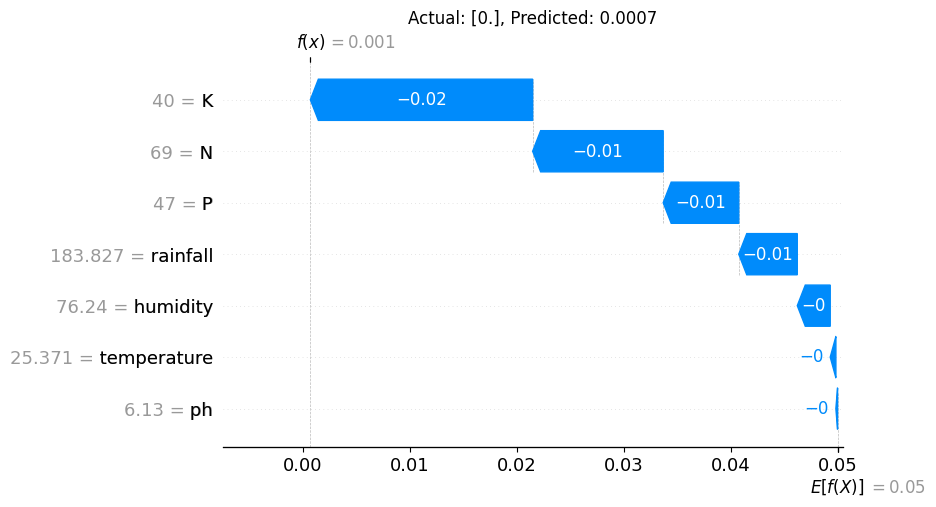

Instance 74:
Actual: [0.] | Predicted: 0.0005


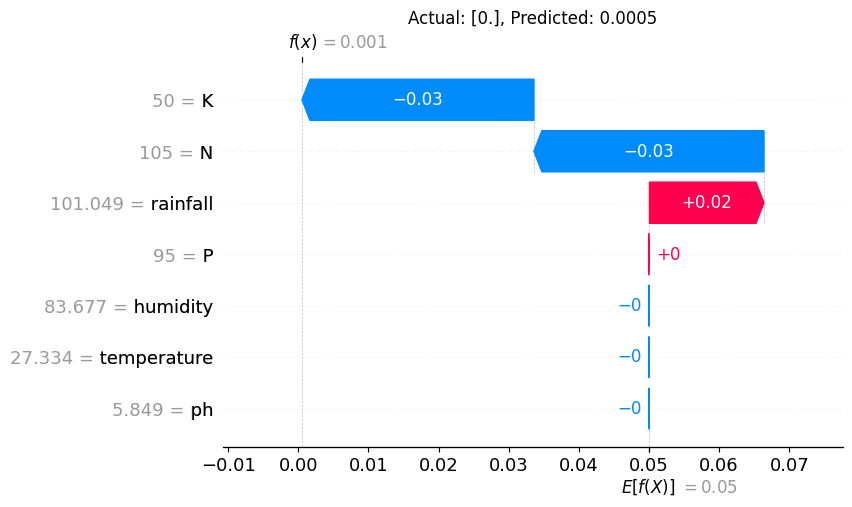

Instance 75:
Actual: [0.] | Predicted: 0.0003


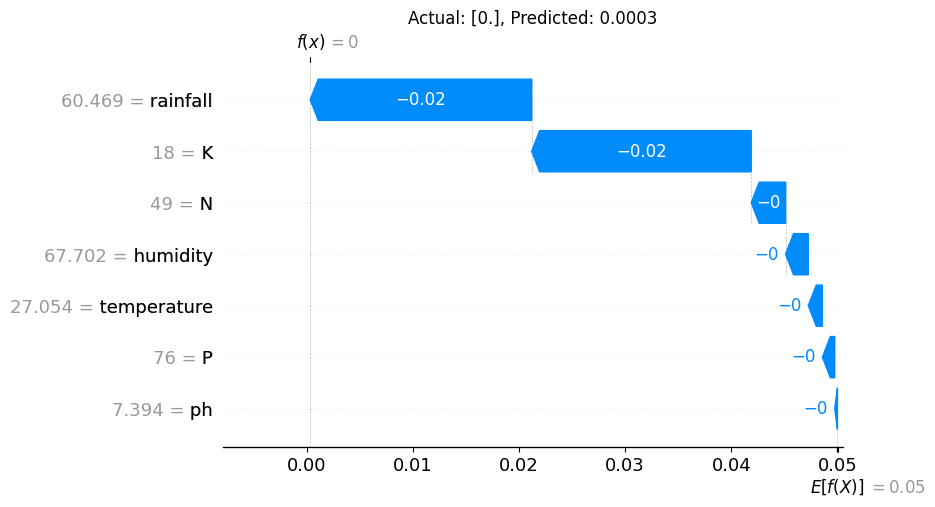

Instance 76:
Actual: [0.] | Predicted: 0.0008


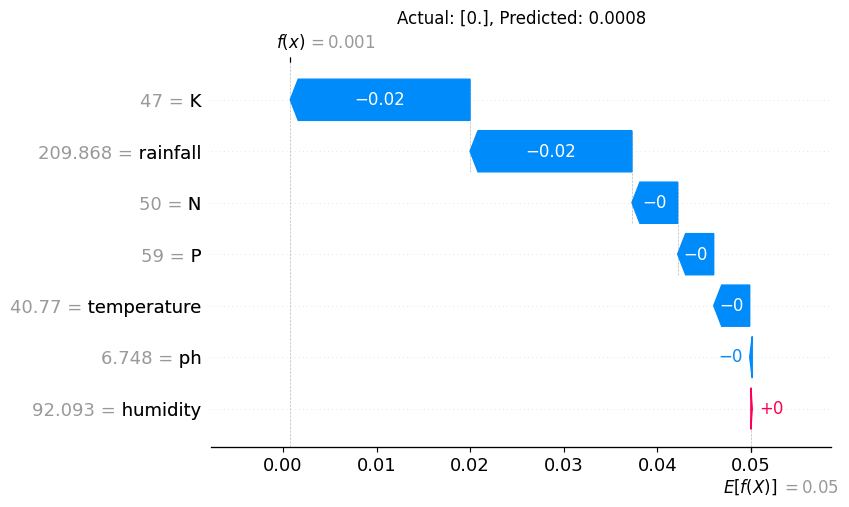

Instance 77:
Actual: [0.] | Predicted: 0.0004


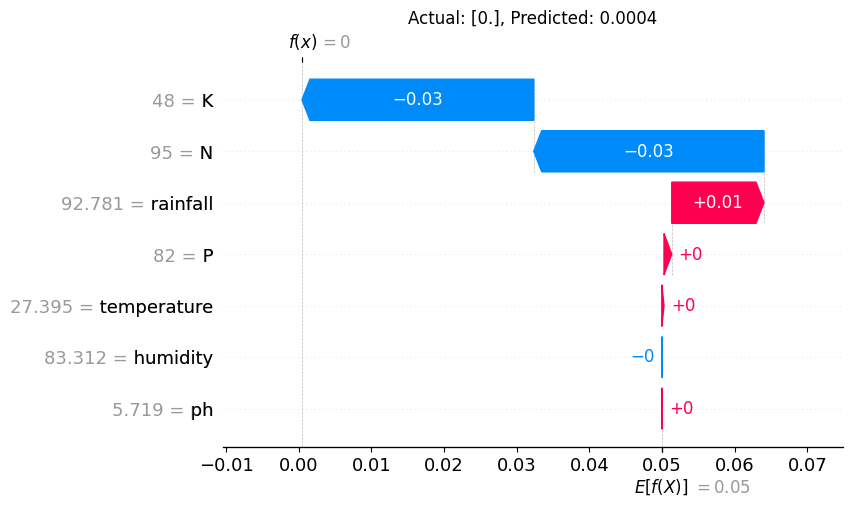

Instance 78:
Actual: [0.] | Predicted: 0.0006


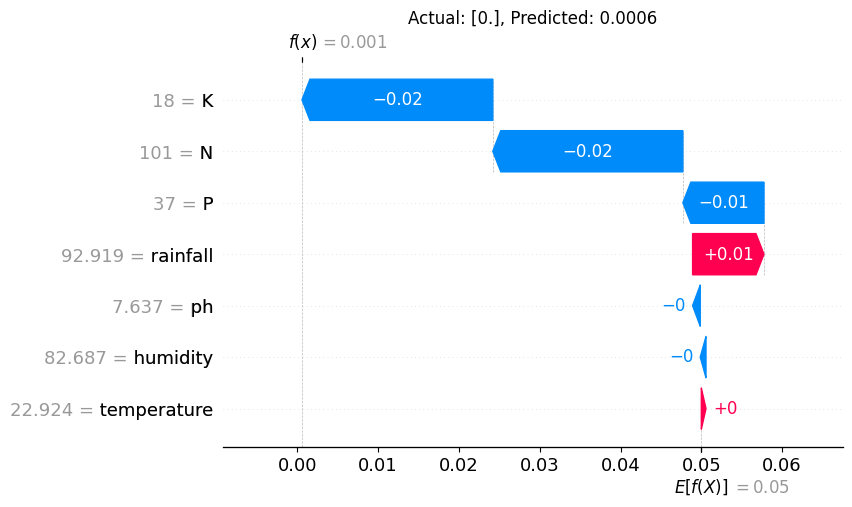

Instance 79:
Actual: [0.] | Predicted: 0.0004


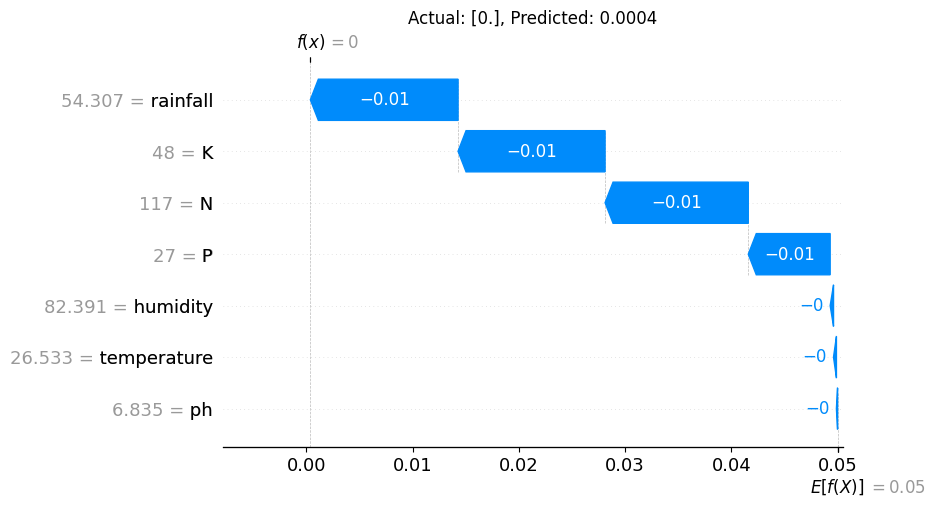

Instance 80:
Actual: [0.] | Predicted: 0.0004


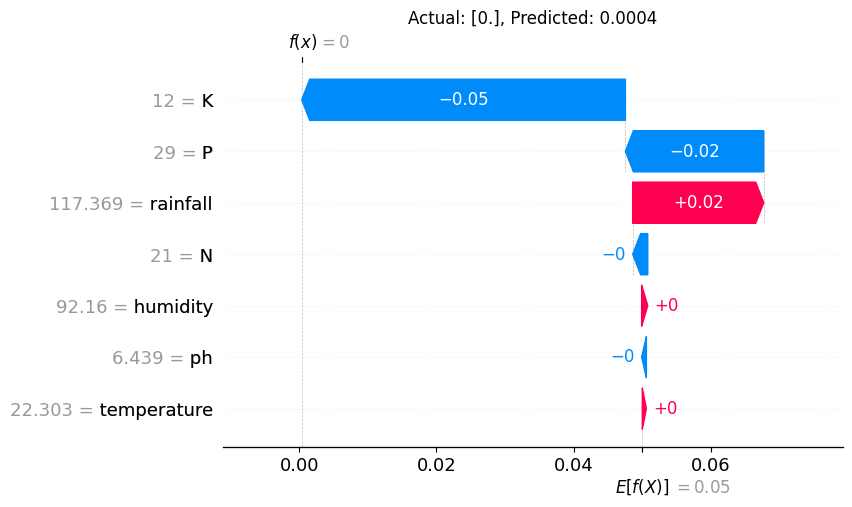

Instance 81:
Actual: [0.] | Predicted: 0.0006


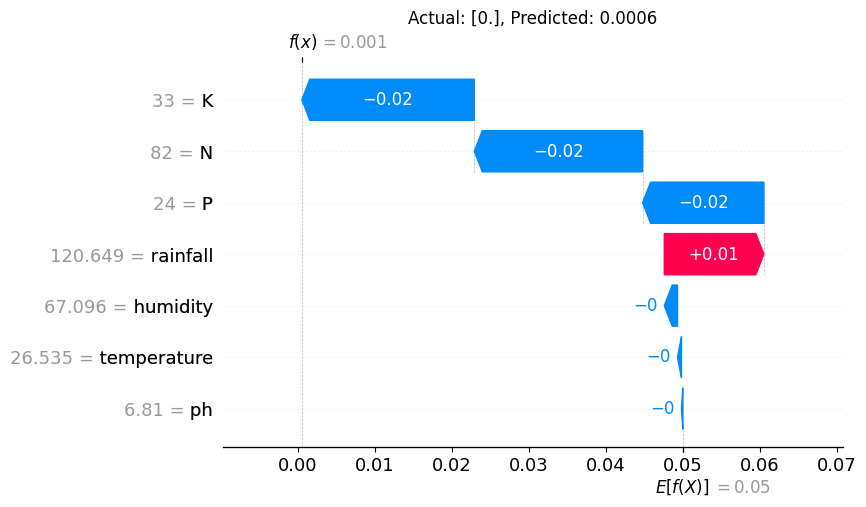

Instance 82:
Actual: [0.] | Predicted: 0.0000


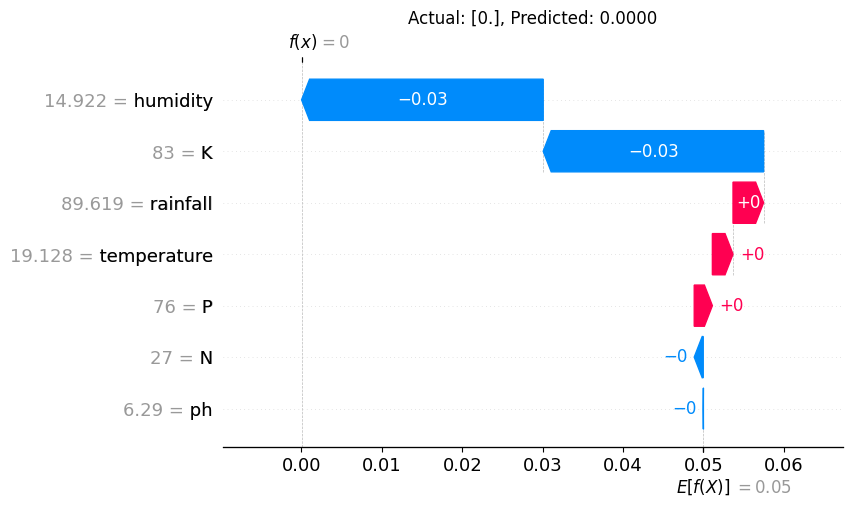

Instance 83:
Actual: [0.] | Predicted: 0.0008


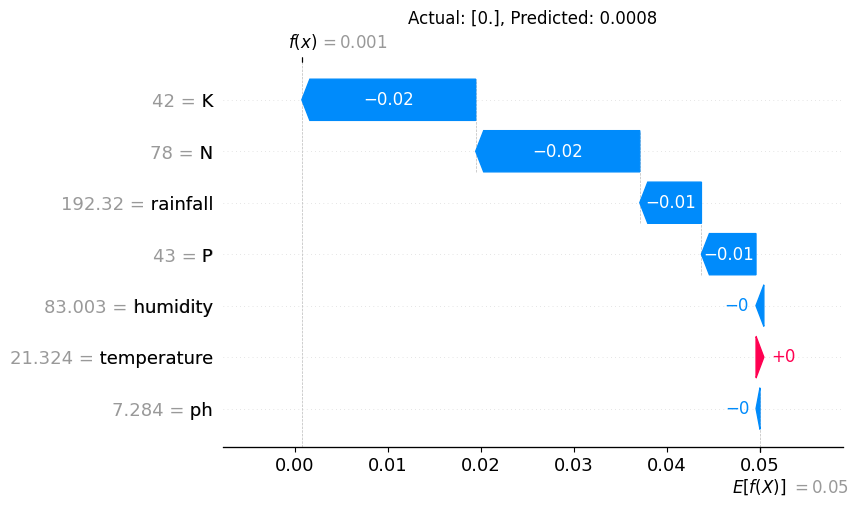

Instance 84:
Actual: [0.] | Predicted: 0.0001


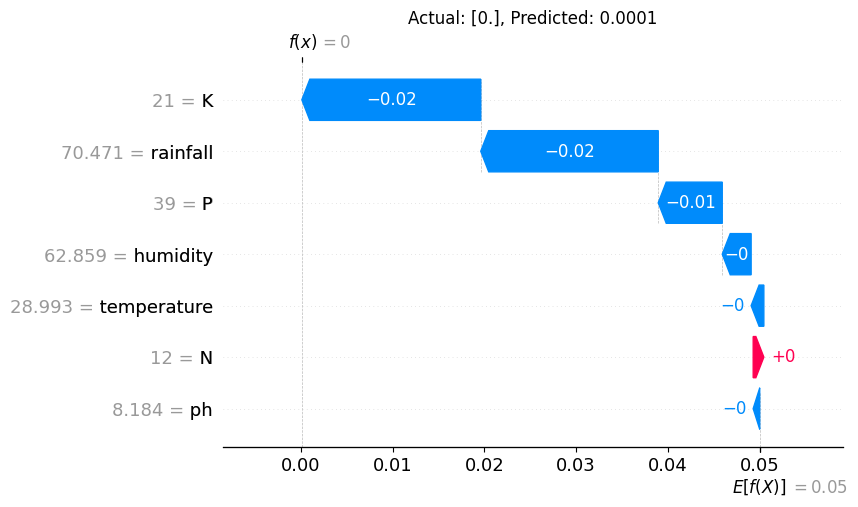

Instance 85:
Actual: [0.] | Predicted: 0.0004


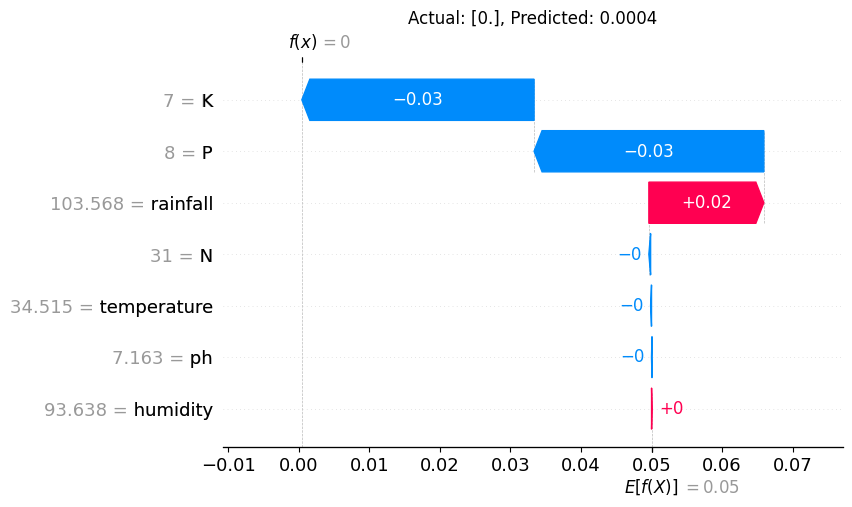

Instance 86:
Actual: [0.] | Predicted: 0.0003


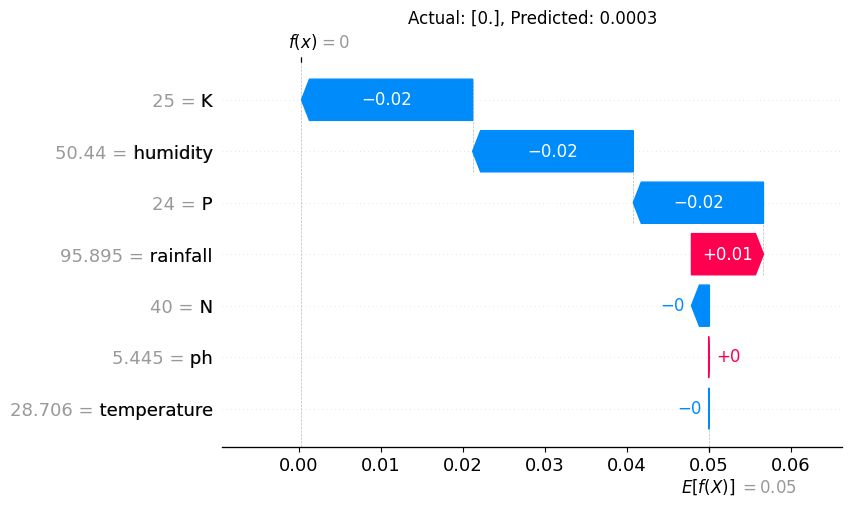

Instance 87:
Actual: [0.] | Predicted: 0.0008


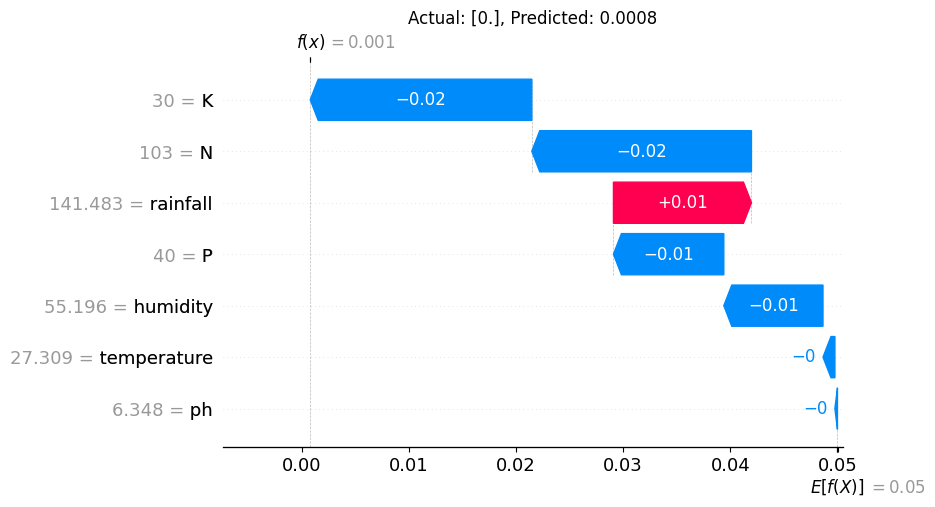

Instance 88:
Actual: [0.] | Predicted: 0.0001


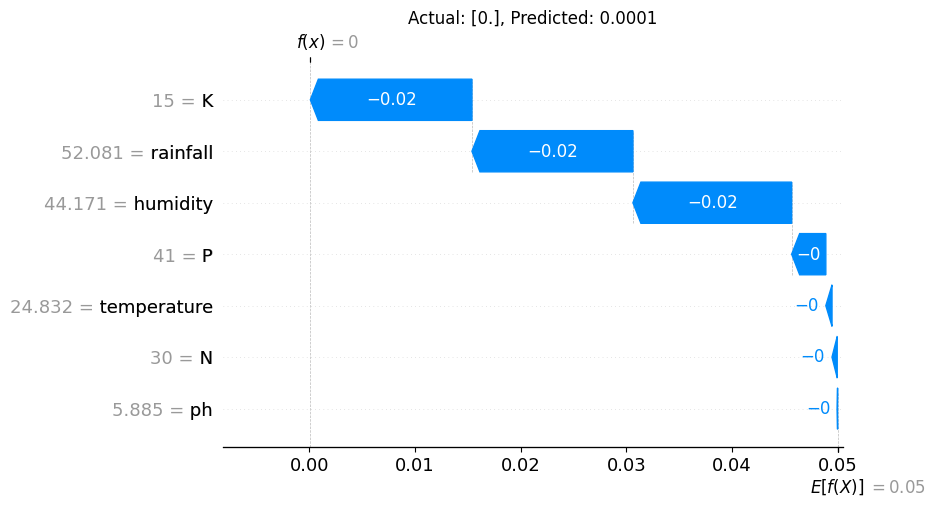

Instance 89:
Actual: [0.] | Predicted: 0.0003


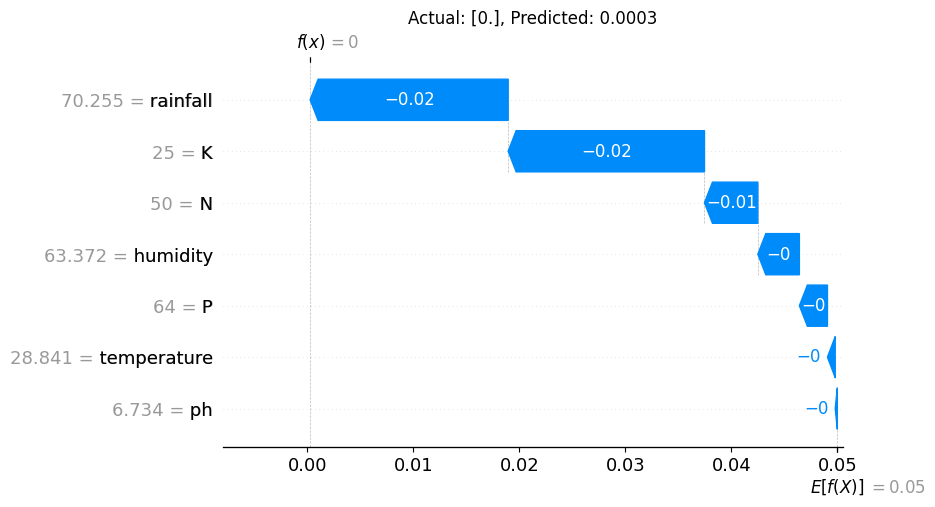

Instance 90:
Actual: [0.] | Predicted: 0.0002


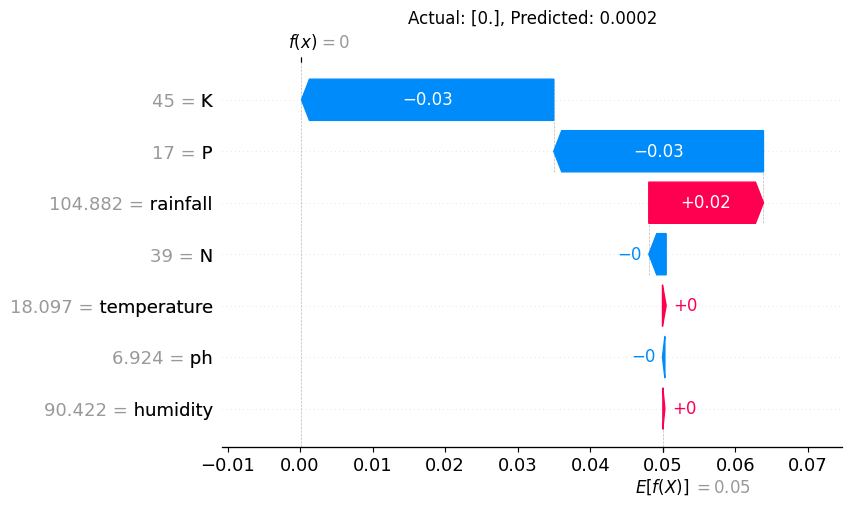

Instance 91:
Actual: [0.] | Predicted: 0.0004


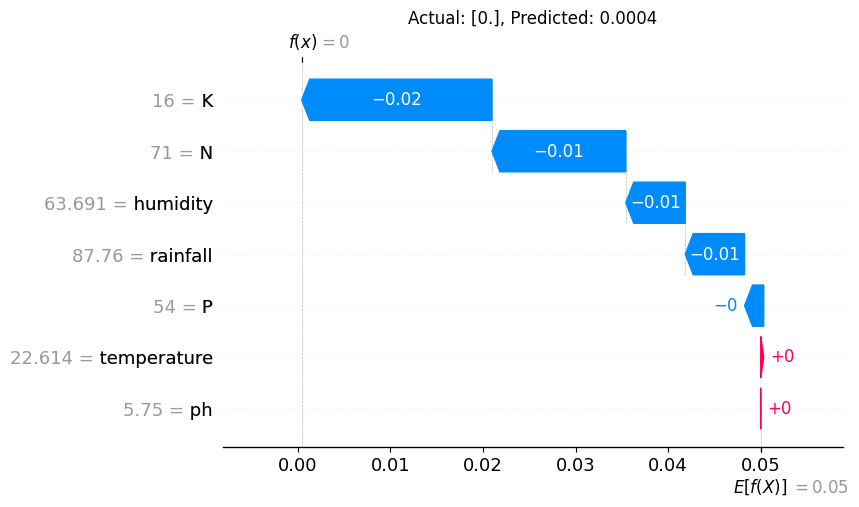

Instance 92:
Actual: [0.] | Predicted: 0.0001


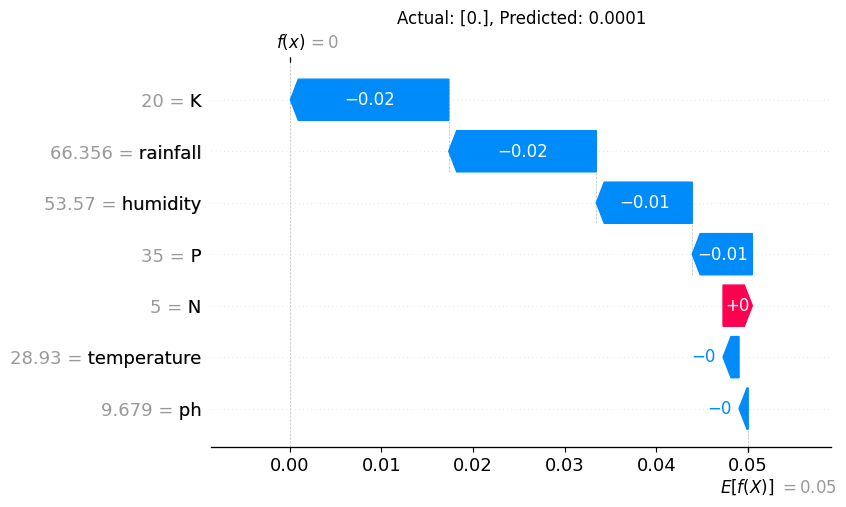

Instance 93:
Actual: [0.] | Predicted: 0.0006


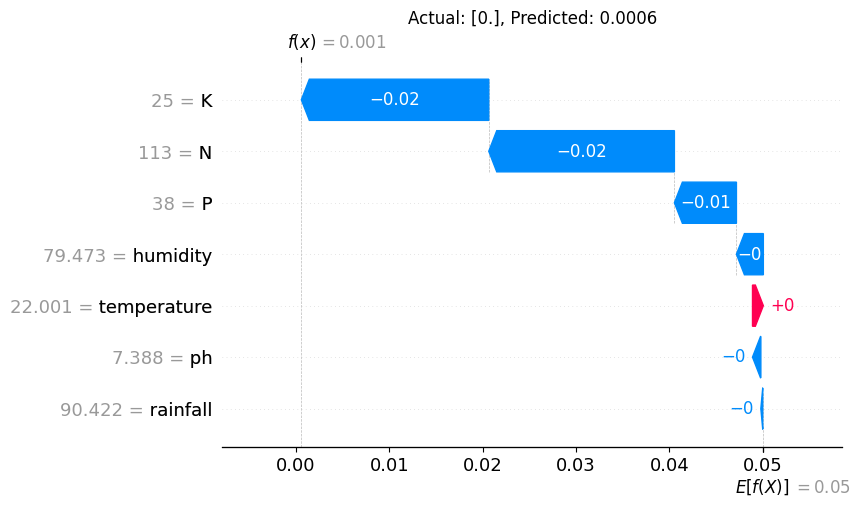

Instance 94:
Actual: [0.] | Predicted: 0.0005


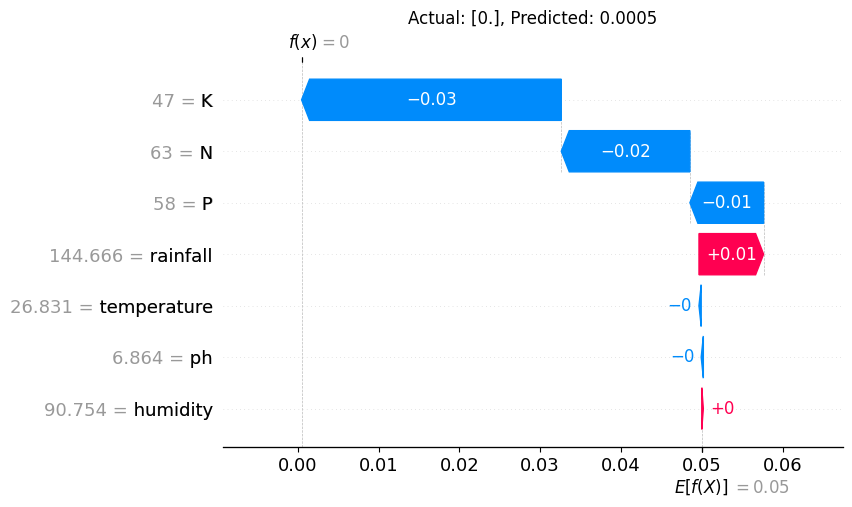

Instance 95:
Actual: [0.] | Predicted: 0.0003


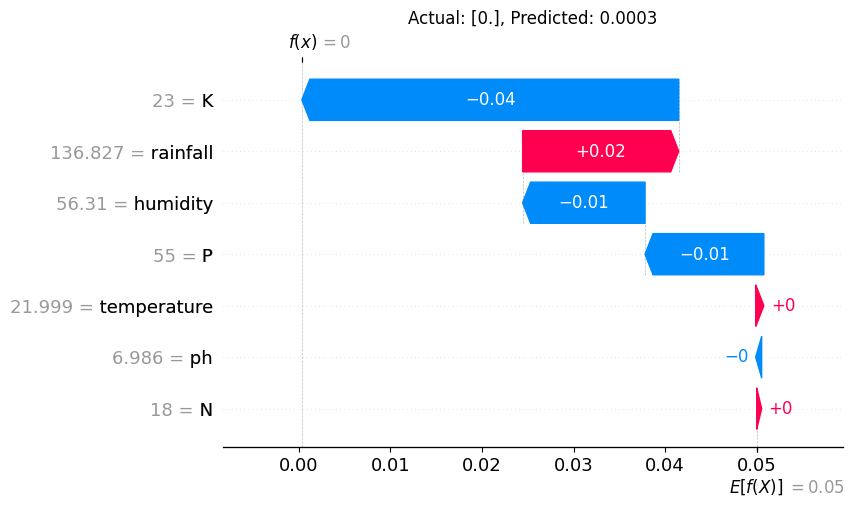

Instance 96:
Actual: [0.] | Predicted: 0.0002


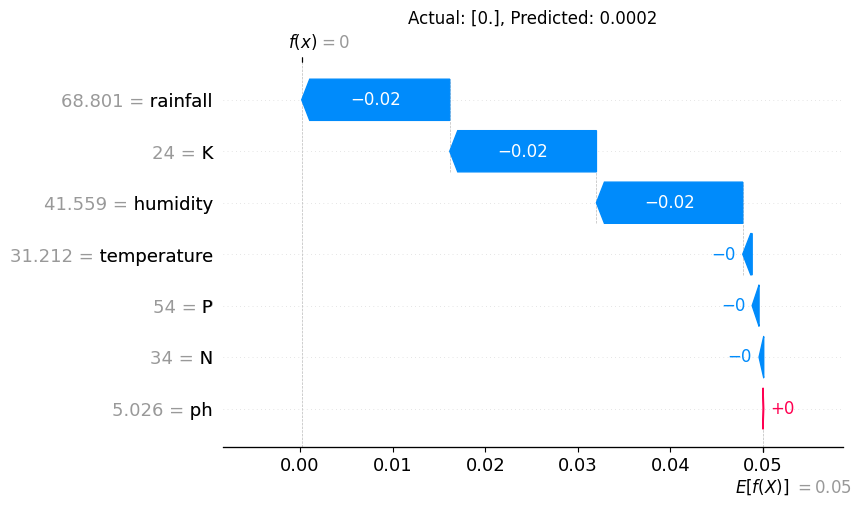

Instance 97:
Actual: [0.] | Predicted: 0.0003


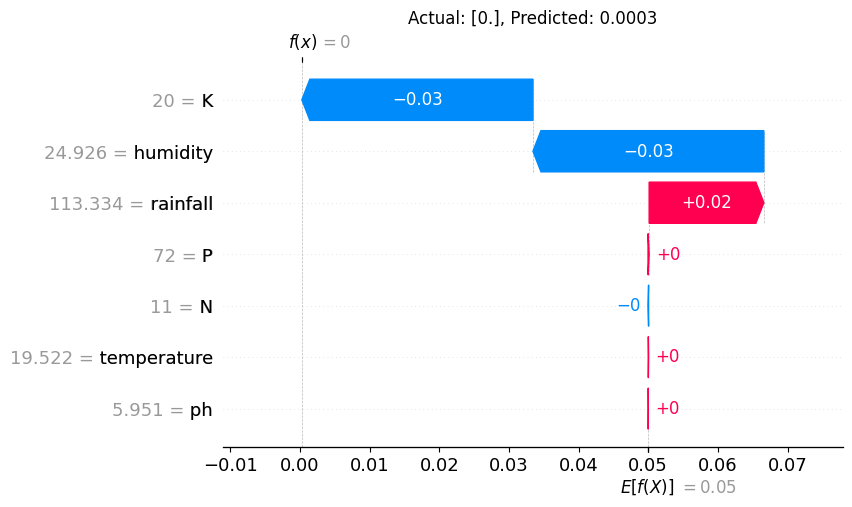

Instance 98:
Actual: [0.] | Predicted: 0.0007


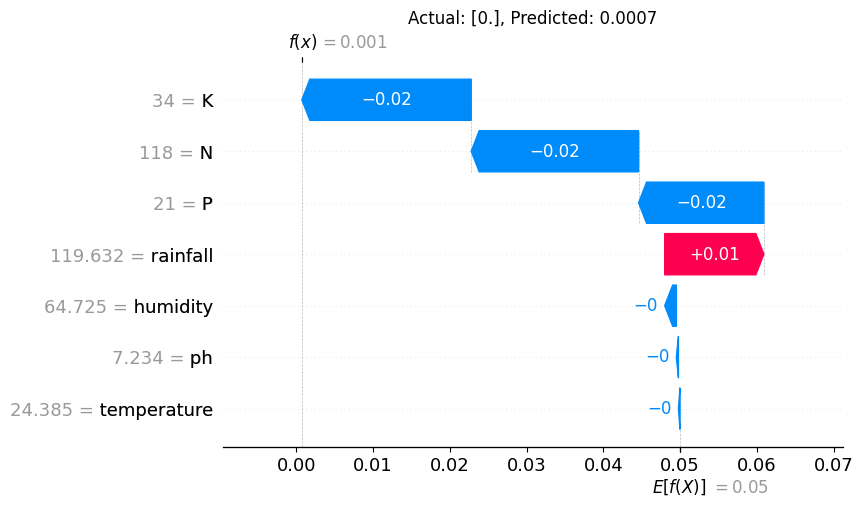

Instance 99:
Actual: [0.] | Predicted: 0.0002


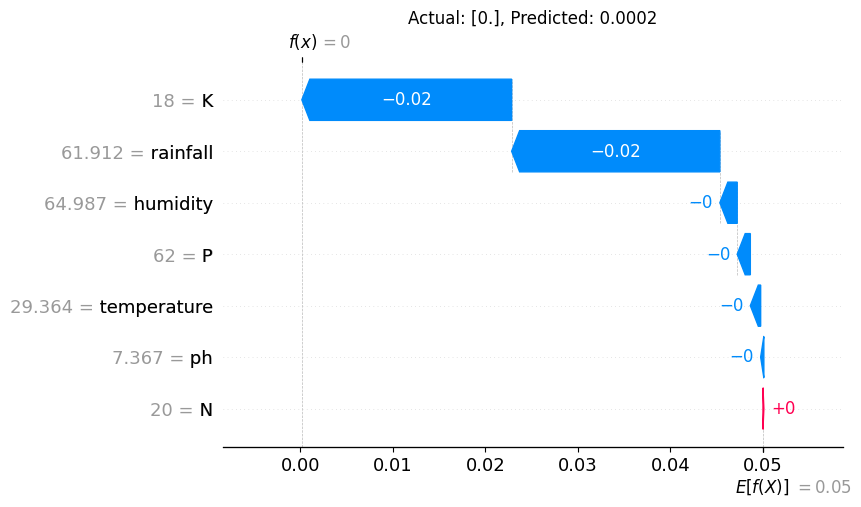

Instance 100:
Actual: [0.] | Predicted: 0.0001


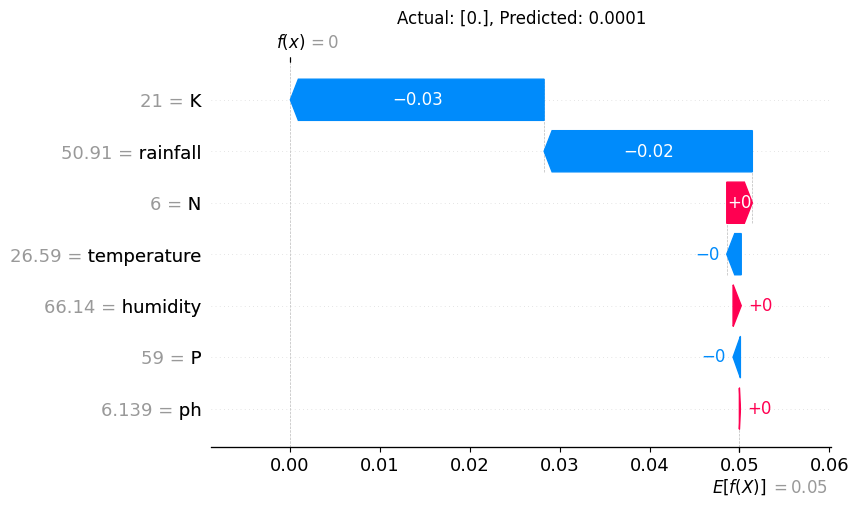

In [16]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test[:100]).flatten()  # Get predictions for the first 10 examples

# Generate SHAP explanations
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test[:100])
shap_values.feature_names = x_columns

# Visualize SHAP explanations with y_test and y_pred
for i in range(100):
    print(f"Instance {i+1}:")
    print(f"Actual: {Y_test[i]} | Predicted: {y_pred[i]:.4f}")
    
    shap.plots.waterfall(shap_values[i], show=False)
    plt.title(f"Actual: {Y_test[i]}, Predicted: {y_pred[i]:.4f}")
    plt.show()


In [8]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# === 1. SHAP Analysis ===
explainer = shap.KernelExplainer(model.predict, X_test[:100])  # Sampling to reduce computation
shap_values = explainer.shap_values(X_test[:100])

# Debug Shapes
print("SHAP Values Shape (samples, features, classes):", np.array(shap_values).shape)
print("X_test[:50] Shape:", X_test[:50].shape)

# Predicted Classes
predicted_classes = np.argmax(model.predict(X_test[:50]), axis=1)  # Predicted class indices
print("Predicted Classes:", predicted_classes)

# Extract SHAP values for the predicted class for each sample
selected_shap_values = np.zeros((shap_values.shape[0], shap_values.shape[1]))  # Shape: (samples, features)
for i, pred_class in enumerate(predicted_classes):
    selected_shap_values[i] = shap_values[i, :, pred_class]  # Extract SHAP values for the predicted class

# Verify Alignment
print("Selected SHAP Values Shape:", selected_shap_values.shape)

# SHAP Summary Plot for the Predicted Class
shap.summary_plot(selected_shap_values, X_test[:50], feature_names=feature_columns)

# SHAP Dependence Plot for a Feature (e.g., 'N')
shap.dependence_plot(0, selected_shap_values, X_test[:50], feature_names=feature_columns)  # Feature index 0


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


  1%|          | 1/100 [00:00<00:29,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


  2%|▏         | 2/100 [00:00<00:28,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step


  3%|▎         | 3/100 [00:00<00:27,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


  4%|▍         | 4/100 [00:01<00:27,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


  5%|▌         | 5/100 [00:01<00:27,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step


  6%|▌         | 6/100 [00:01<00:26,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step


  7%|▋         | 7/100 [00:01<00:26,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


  8%|▊         | 8/100 [00:02<00:26,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


  9%|▉         | 9/100 [00:02<00:26,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step


 10%|█         | 10/100 [00:02<00:25,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step


 11%|█         | 11/100 [00:03<00:25,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


 12%|█▏        | 12/100 [00:03<00:24,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step


 13%|█▎        | 13/100 [00:03<00:24,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step


 14%|█▍        | 14/100 [00:03<00:24,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


 15%|█▌        | 15/100 [00:04<00:23,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


 16%|█▌        | 16/100 [00:04<00:23,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step


 17%|█▋        | 17/100 [00:04<00:23,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


 18%|█▊        | 18/100 [00:05<00:22,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step


 19%|█▉        | 19/100 [00:05<00:22,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step


 20%|██        | 20/100 [00:05<00:22,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


 21%|██        | 21/100 [00:05<00:21,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step


 22%|██▏       | 22/100 [00:06<00:21,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


 23%|██▎       | 23/100 [00:06<00:21,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step


 24%|██▍       | 24/100 [00:06<00:21,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


 25%|██▌       | 25/100 [00:07<00:20,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


 26%|██▌       | 26/100 [00:07<00:20,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


 27%|██▋       | 27/100 [00:07<00:20,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step


 28%|██▊       | 28/100 [00:07<00:20,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


 29%|██▉       | 29/100 [00:08<00:19,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


 30%|███       | 30/100 [00:08<00:19,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step


 31%|███       | 31/100 [00:08<00:19,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step


 32%|███▏      | 32/100 [00:08<00:18,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


 33%|███▎      | 33/100 [00:09<00:18,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


 34%|███▍      | 34/100 [00:09<00:18,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step


 35%|███▌      | 35/100 [00:09<00:18,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


 36%|███▌      | 36/100 [00:10<00:17,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


 37%|███▋      | 37/100 [00:10<00:17,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step


 38%|███▊      | 38/100 [00:10<00:17,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step


 39%|███▉      | 39/100 [00:10<00:16,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


 40%|████      | 40/100 [00:11<00:16,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


 41%|████      | 41/100 [00:11<00:16,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step


 42%|████▏     | 42/100 [00:11<00:15,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step


 43%|████▎     | 43/100 [00:12<00:15,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


 44%|████▍     | 44/100 [00:12<00:15,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


 45%|████▌     | 45/100 [00:12<00:15,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


 46%|████▌     | 46/100 [00:12<00:14,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


 47%|████▋     | 47/100 [00:13<00:14,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


 48%|████▊     | 48/100 [00:13<00:14,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step


 49%|████▉     | 49/100 [00:13<00:14,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step


 50%|█████     | 50/100 [00:13<00:13,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


 51%|█████     | 51/100 [00:14<00:13,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


 52%|█████▏    | 52/100 [00:14<00:13,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step


 53%|█████▎    | 53/100 [00:14<00:12,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step


 54%|█████▍    | 54/100 [00:15<00:12,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


 55%|█████▌    | 55/100 [00:15<00:12,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step


 56%|█████▌    | 56/100 [00:15<00:12,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step


 57%|█████▋    | 57/100 [00:15<00:11,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step


 58%|█████▊    | 58/100 [00:16<00:11,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


 59%|█████▉    | 59/100 [00:16<00:11,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step


 60%|██████    | 60/100 [00:16<00:11,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


 61%|██████    | 61/100 [00:17<00:10,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


 62%|██████▏   | 62/100 [00:17<00:10,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step


 63%|██████▎   | 63/100 [00:17<00:10,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step


 64%|██████▍   | 64/100 [00:17<00:09,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step


 65%|██████▌   | 65/100 [00:18<00:09,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


 66%|██████▌   | 66/100 [00:18<00:09,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step


 67%|██████▋   | 67/100 [00:18<00:09,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step


 68%|██████▊   | 68/100 [00:18<00:08,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


 69%|██████▉   | 69/100 [00:19<00:08,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


 70%|███████   | 70/100 [00:19<00:08,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step


 71%|███████   | 71/100 [00:19<00:08,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


 72%|███████▏  | 72/100 [00:20<00:07,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


 73%|███████▎  | 73/100 [00:20<00:07,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


 74%|███████▍  | 74/100 [00:20<00:07,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step


 75%|███████▌  | 75/100 [00:20<00:07,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


 76%|███████▌  | 76/100 [00:21<00:06,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


 77%|███████▋  | 77/100 [00:21<00:06,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step


 78%|███████▊  | 78/100 [00:21<00:06,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step


 79%|███████▉  | 79/100 [00:22<00:05,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


 80%|████████  | 80/100 [00:22<00:05,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step


 81%|████████  | 81/100 [00:22<00:05,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step


 82%|████████▏ | 82/100 [00:22<00:04,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


 83%|████████▎ | 83/100 [00:23<00:04,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


 84%|████████▍ | 84/100 [00:23<00:04,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step


 85%|████████▌ | 85/100 [00:23<00:04,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


 86%|████████▌ | 86/100 [00:24<00:03,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step


 87%|████████▋ | 87/100 [00:24<00:03,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step


 88%|████████▊ | 88/100 [00:24<00:03,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step


 89%|████████▉ | 89/100 [00:24<00:03,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


 90%|█████████ | 90/100 [00:25<00:02,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


 91%|█████████ | 91/100 [00:25<00:02,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step


 92%|█████████▏| 92/100 [00:25<00:02,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step


 93%|█████████▎| 93/100 [00:25<00:01,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step


 94%|█████████▍| 94/100 [00:26<00:01,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


 95%|█████████▌| 95/100 [00:26<00:01,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step


 96%|█████████▌| 96/100 [00:26<00:01,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step


 97%|█████████▋| 97/100 [00:27<00:00,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


 98%|█████████▊| 98/100 [00:27<00:00,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step


 99%|█████████▉| 99/100 [00:27<00:00,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step


100%|██████████| 100/100 [00:27<00:00,  3.58it/s]

SHAP Values Shape (samples, features, classes): (100, 7, 1)
X_test[:50] Shape: (50, 7)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Selected SHAP Values Shape: (100, 7)


IndexError: index 78 is out of bounds for axis 0 with size 50

In [ ]:
import shap
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

# === 1. SHAP Analysis ===
explainer = shap.KernelExplainer(model.predict, X_test[:100])  # Sampling to reduce computation
shap_values = explainer.shap_values(X_test[:100])

# SHAP summary plot
# # Ensure feature_columns matches the input data shape
assert len(feature_columns) == X_test.shape[1], "Feature names and input data dimensions must match."

# Correct usage of SHAP explainer
explainer = shap.KernelExplainer(model.predict, X_test[:50])  # Use a smaller subset for faster computation
shap_values = explainer.shap_values(X_test[:50])

# Aggregate SHAP values across all classes
shap_values_mean = np.mean(shap_values, axis=0)

# SHAP summary plot for averaged SHAP values
shap.summary_plot(shap_values_mean, X_test[:50], feature_names=feature_columns)


# Check SHAP values shape
print("SHAP Values Shape:", np.array(shap_values).shape)
print("Feature Names Length:", len(feature_columns))

# Plot SHAP summary
shap.summary_plot(shap_values[0], X_test[:50], feature_names=feature_columns)

# Plot SHAP dependence for a specific feature (e.g., 'N')
shap.dependence_plot('N', shap_values[0], X_test[:50], feature_names=feature_columns)


# SHAP dependence plot for a specific feature
shap.dependence_plot(0, shap_values[0], X_test[:100], feature_names=feature_columns)

# === 2. Permutation Importance ===
perm_importance = permutation_importance(model, X_test, Y_test, scoring='accuracy', n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': perm_importance.importances_mean})
perm_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title("Permutation Importance of Features")
plt.show()

# === 3. Latent Space Visualization (t-SNE) ===
# Extract features from the second-to-last layer of the model
intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
intermediate_output = intermediate_layer_model.predict(X_test)

# Reduce dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(intermediate_output)

plt.figure(figsize=(10, 6))
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=Y_true_classes, cmap='tab10', alpha=0.8)
plt.colorbar(label="True Class")
plt.title("Latent Space Visualization with t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# === 4. Class-Specific Analysis ===
prec, recall, fscore, _ = precision_recall_fscore_support(Y_true_classes, Y_pred_classes, average=None)
class_perf = pd.DataFrame({'Class': [col.replace('label_', '') for col in df_encoded.columns if 'label_' in col],
                           'Precision': prec, 'Recall': recall, 'F1-Score': fscore})

print("\nClass-Specific Performance Metrics:")
print(class_perf)

plt.figure(figsize=(12, 6))
class_perf.set_index('Class').plot(kind='bar', figsize=(12, 6))
plt.title("Class-Specific Performance Metrics")
plt.xlabel("Class")
plt.ylabel("Score")
plt.legend(loc='best')
plt.show()

# === 5. Residual Analysis ===
residuals = np.abs(Y_true_classes - Y_pred_classes)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# === 6. Partial Dependence Plots ===
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay

# Train a simpler model for PDP (TensorFlow doesn't support it directly)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train.argmax(axis=1))

fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(rf_model, X_test, [0, 1], feature_names=feature_columns, ax=ax)
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step


  1%|          | 1/100 [00:00<00:30,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


  2%|▏         | 2/100 [00:00<00:30,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step


  3%|▎         | 3/100 [00:00<00:30,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


  4%|▍         | 4/100 [00:01<00:30,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


  5%|▌         | 5/100 [00:01<00:29,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


  6%|▌         | 6/100 [00:01<00:29,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


  7%|▋         | 7/100 [00:02<00:29,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


  8%|▊         | 8/100 [00:02<00:28,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step


  9%|▉         | 9/100 [00:02<00:28,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


 10%|█         | 10/100 [00:03<00:28,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


 11%|█         | 11/100 [00:03<00:28,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


 12%|█▏        | 12/100 [00:03<00:27,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step


 13%|█▎        | 13/100 [00:04<00:27,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step


 14%|█▍        | 14/100 [00:04<00:27,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


 15%|█▌        | 15/100 [00:04<00:26,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step


 16%|█▌        | 16/100 [00:05<00:26,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


 17%|█▋        | 17/100 [00:05<00:26,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


 18%|█▊        | 18/100 [00:05<00:25,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


 19%|█▉        | 19/100 [00:06<00:25,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step


 20%|██        | 20/100 [00:06<00:25,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


 21%|██        | 21/100 [00:06<00:25,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step


 22%|██▏       | 22/100 [00:07<00:25,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step


 23%|██▎       | 23/100 [00:07<00:25,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


 24%|██▍       | 24/100 [00:07<00:24,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


 25%|██▌       | 25/100 [00:07<00:24,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


 26%|██▌       | 26/100 [00:08<00:23,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


 27%|██▋       | 27/100 [00:08<00:22,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step


 28%|██▊       | 28/100 [00:08<00:23,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step


 29%|██▉       | 29/100 [00:09<00:22,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


 30%|███       | 30/100 [00:09<00:21,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step


 31%|███       | 31/100 [00:09<00:21,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


 32%|███▏      | 32/100 [00:10<00:21,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step


 33%|███▎      | 33/100 [00:10<00:20,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


 34%|███▍      | 34/100 [00:10<00:20,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


 35%|███▌      | 35/100 [00:11<00:20,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


 36%|███▌      | 36/100 [00:11<00:20,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


 37%|███▋      | 37/100 [00:11<00:19,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step


 38%|███▊      | 38/100 [00:12<00:19,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


 39%|███▉      | 39/100 [00:12<00:19,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step


 40%|████      | 40/100 [00:12<00:19,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


 41%|████      | 41/100 [00:13<00:18,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


 42%|████▏     | 42/100 [00:13<00:18,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


 43%|████▎     | 43/100 [00:13<00:18,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step


 44%|████▍     | 44/100 [00:14<00:18,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


 45%|████▌     | 45/100 [00:14<00:17,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


 46%|████▌     | 46/100 [00:14<00:17,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


 47%|████▋     | 47/100 [00:14<00:17,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


 48%|████▊     | 48/100 [00:15<00:16,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


 49%|████▉     | 49/100 [00:15<00:16,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


 50%|█████     | 50/100 [00:15<00:16,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step


 51%|█████     | 51/100 [00:16<00:16,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


 52%|█████▏    | 52/100 [00:16<00:15,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


 53%|█████▎    | 53/100 [00:16<00:15,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


 54%|█████▍    | 54/100 [00:17<00:14,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


 55%|█████▌    | 55/100 [00:17<00:14,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step


 56%|█████▌    | 56/100 [00:17<00:14,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


 57%|█████▋    | 57/100 [00:18<00:14,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


 58%|█████▊    | 58/100 [00:18<00:13,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


 59%|█████▉    | 59/100 [00:18<00:13,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


 60%|██████    | 60/100 [00:19<00:12,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


 61%|██████    | 61/100 [00:19<00:12,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step


 62%|██████▏   | 62/100 [00:19<00:11,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step


 63%|██████▎   | 63/100 [00:20<00:11,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


 64%|██████▍   | 64/100 [00:20<00:11,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


 65%|██████▌   | 65/100 [00:20<00:10,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


 66%|██████▌   | 66/100 [00:21<00:10,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


 67%|██████▋   | 67/100 [00:21<00:10,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


 68%|██████▊   | 68/100 [00:21<00:09,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step


 69%|██████▉   | 69/100 [00:21<00:09,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


 70%|███████   | 70/100 [00:22<00:09,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step


 71%|███████   | 71/100 [00:22<00:09,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step


 72%|███████▏  | 72/100 [00:22<00:09,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


 73%|███████▎  | 73/100 [00:23<00:08,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


 74%|███████▍  | 74/100 [00:23<00:08,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step


 75%|███████▌  | 75/100 [00:23<00:08,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


 76%|███████▌  | 76/100 [00:24<00:07,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


 77%|███████▋  | 77/100 [00:24<00:07,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step


 78%|███████▊  | 78/100 [00:24<00:07,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step


 79%|███████▉  | 79/100 [00:25<00:06,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


 80%|████████  | 80/100 [00:25<00:06,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step


 81%|████████  | 81/100 [00:25<00:06,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


 82%|████████▏ | 82/100 [00:26<00:05,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


 83%|████████▎ | 83/100 [00:26<00:05,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step


 84%|████████▍ | 84/100 [00:26<00:05,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


 85%|████████▌ | 85/100 [00:27<00:04,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


 86%|████████▌ | 86/100 [00:27<00:04,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


 87%|████████▋ | 87/100 [00:27<00:04,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step


 88%|████████▊ | 88/100 [00:28<00:03,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step


 89%|████████▉ | 89/100 [00:28<00:03,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


 90%|█████████ | 90/100 [00:28<00:03,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step


 91%|█████████ | 91/100 [00:29<00:02,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


 92%|█████████▏| 92/100 [00:29<00:02,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step


 93%|█████████▎| 93/100 [00:29<00:02,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step


 94%|█████████▍| 94/100 [00:30<00:01,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step


 95%|█████████▌| 95/100 [00:30<00:01,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


 96%|█████████▌| 96/100 [00:30<00:01,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step


 97%|█████████▋| 97/100 [00:30<00:00,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


 98%|█████████▊| 98/100 [00:31<00:00,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


 99%|█████████▉| 99/100 [00:31<00:00,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step


100%|██████████| 100/100 [00:31<00:00,  3.13it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step



  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


  2%|▏         | 1/50 [00:00<00:10,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


  4%|▍         | 2/50 [00:00<00:09,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step


  6%|▌         | 3/50 [00:00<00:09,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step


  8%|▊         | 4/50 [00:00<00:09,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step


 10%|█         | 5/50 [00:01<00:09,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step


 12%|█▏        | 6/50 [00:01<00:09,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step


 14%|█▍        | 7/50 [00:01<00:08,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step


 16%|█▌        | 8/50 [00:01<00:08,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


 18%|█▊        | 9/50 [00:01<00:08,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step


 20%|██        | 10/50 [00:02<00:08,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


 22%|██▏       | 11/50 [00:02<00:07,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


 24%|██▍       | 12/50 [00:02<00:07,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


 26%|██▌       | 13/50 [00:02<00:07,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step


 28%|██▊       | 14/50 [00:02<00:07,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step


 30%|███       | 15/50 [00:03<00:07,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step


 32%|███▏      | 16/50 [00:03<00:07,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step


 34%|███▍      | 17/50 [00:03<00:06,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step


 36%|███▌      | 18/50 [00:03<00:06,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


 38%|███▊      | 19/50 [00:03<00:06,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step


 40%|████      | 20/50 [00:04<00:06,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


 42%|████▏     | 21/50 [00:04<00:06,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step


 44%|████▍     | 22/50 [00:04<00:05,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step


 46%|████▌     | 23/50 [00:04<00:05,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step


 48%|████▊     | 24/50 [00:04<00:05,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step


 50%|█████     | 25/50 [00:05<00:05,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


 52%|█████▏    | 26/50 [00:05<00:05,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step


 54%|█████▍    | 27/50 [00:05<00:04,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step


 56%|█████▌    | 28/50 [00:05<00:04,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step


 58%|█████▊    | 29/50 [00:06<00:04,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step


 60%|██████    | 30/50 [00:06<00:04,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step


 62%|██████▏   | 31/50 [00:06<00:03,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step


 64%|██████▍   | 32/50 [00:06<00:03,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step


 66%|██████▌   | 33/50 [00:06<00:03,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step


 68%|██████▊   | 34/50 [00:07<00:03,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step


 70%|███████   | 35/50 [00:07<00:03,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


 72%|███████▏  | 36/50 [00:07<00:02,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step


 74%|███████▍  | 37/50 [00:07<00:02,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step


 76%|███████▌  | 38/50 [00:07<00:02,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step


 78%|███████▊  | 39/50 [00:08<00:02,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step


 80%|████████  | 40/50 [00:08<00:02,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step


 82%|████████▏ | 41/50 [00:08<00:01,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step


 84%|████████▍ | 42/50 [00:08<00:01,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


 86%|████████▌ | 43/50 [00:08<00:01,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step


 88%|████████▊ | 44/50 [00:09<00:01,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step


 90%|█████████ | 45/50 [00:09<00:01,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


 92%|█████████▏| 46/50 [00:09<00:00,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step


 94%|█████████▍| 47/50 [00:09<00:00,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step


 96%|█████████▌| 48/50 [00:09<00:00,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step


 98%|█████████▊| 49/50 [00:10<00:00,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


100%|██████████| 50/50 [00:10<00:00,  4.82it/s]


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.